# Lead Score Case study

## Problem Statement

#### An education company named X Education sells online courses to industry professionals. On any given day, many professionals who are interested in the courses land on their website and browse for courses.

#### X Education needs to select the most promising leads, i.e. the leads that are most likely to convert into paying customers. The company requires to build a model in which person can assign a lead score to each of the leads such that the customers with higher lead score have a higher conversion chance and the customers with lower lead score have a lower conversion chance. The CEO, in particular, has given a ballpark of the target lead conversion rate to be around 80%.

## Goal and Objective

- Build a logistic regression model to assign a lead score between 0 and 100 to each of the leads which can be used by the company to target potential leads. A higher score would mean that the lead is hot, i.e. is most likely to convert whereas a lower score would mean that the lead is cold and will mostly not get converted.
- There are some more problems presented by the company which your model should be able to adjust to if the company's requirement changes in the future so you will need to handle these as well. These problems are provided in a separate doc file. Please fill it based on the logistic regression model you got in the first step. Also, make sure you include this in your final PPT where you'll make recommendations.

In [1]:
# Suppressing Warnings
import warnings
warnings.filterwarnings('ignore')

#Importing required packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE

In [2]:
# Importing data Set
df = pd.read_csv("Leads.csv")

In [3]:
df.head()

Prospect ID  Lead Number              Lead Origin  \
0  7927b2df-8bba-4d29-b9a2-b6e0beafe620       660737                      API   
1  2a272436-5132-4136-86fa-dcc88c88f482       660728                      API   
2  8cc8c611-a219-4f35-ad23-fdfd2656bd8a       660727  Landing Page Submission   
3  0cc2df48-7cf4-4e39-9de9-19797f9b38cc       660719  Landing Page Submission   
4  3256f628-e534-4826-9d63-4a8b88782852       660681  Landing Page Submission   

      Lead Source Do Not Email Do Not Call  Converted  TotalVisits  \
0      Olark Chat           No          No          0          0.0   
1  Organic Search           No          No          0          5.0   
2  Direct Traffic           No          No          1          2.0   
3  Direct Traffic           No          No          0          1.0   
4          Google           No          No          1          2.0   

   Total Time Spent on Website  Page Views Per Visit  ...  \
0                            0                   0.0  ...   
1                          674                   2.5  ...   
2                         1532                   2.0  ...   
3                          305                   1.0  ...   
4                         1428                   1.0  ...   

  Get updates on DM Content    Lead Profile    City  \
0                        No          Select  Select   
1                        No          Select  Select   
2                        No  Potential Lead  Mumbai   
3                        No          Select  Mumbai   
4                        No          Select  Mumbai   

  Asymmetrique Activity Index Asymmetrique Profile Index  \
0                   02.Medium                  02.Medium   
1                   02.Medium                  02.Medium   
2                   02.Medium                    01.High   
3                   02.Medium                    01.High   
4                   02.Medium                    01.High   

  Asymmetrique Activity Score Asymmetrique Profile Score  \
0                        15.0                       15.0   
1                        15.0                       15.0   
2                        14.0                       20.0   
3                        13.0                       17.0   
4                        15.0                       18.0   

  I agree to pay the amount through cheque  \
0                                       No   
1                                       No   
2                                       No   
3                                       No   
4                                       No   

  A free copy of Mastering The Interview Last Notable Activity  
0                                     No              Modified  
1                                     No          Email Opened  
2                                    Yes          Email Opened  
3                                     No              Modified  
4                                     No              Modified  

[5 rows x 37 columns]

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

In [5]:
df.shape

(9240, 37)

In [6]:
df.describe()

Lead Number    Converted  TotalVisits  Total Time Spent on Website  \
count    9240.000000  9240.000000  9103.000000                  9240.000000   
mean   617188.435606     0.385390     3.445238                   487.698268   
std     23405.995698     0.486714     4.854853                   548.021466   
min    579533.000000     0.000000     0.000000                     0.000000   
25%    596484.500000     0.000000     1.000000                    12.000000   
50%    615479.000000     0.000000     3.000000                   248.000000   
75%    637387.250000     1.000000     5.000000                   936.000000   
max    660737.000000     1.000000   251.000000                  2272.000000   

       Page Views Per Visit  Asymmetrique Activity Score  \
count           9103.000000                  5022.000000   
mean               2.362820                    14.306252   
std                2.161418                     1.386694   
min                0.000000                     7.000000   
25%                1.000000                    14.000000   
50%                2.000000                    14.000000   
75%                3.000000                    15.000000   
max               55.000000                    18.000000   

       Asymmetrique Profile Score  
count                 5022.000000  
mean                    16.344883  
std                      1.811395  
min                     11.000000  
25%                     15.000000  
50%                     16.000000  
75%                     18.000000  
max                     20.000000

## Data cleaning

In [7]:
# Replacing 'Select' with NaN
df = df.applymap(lambda s:s.lower() if type(s) == str else s)
df = df.replace('select',np.nan)

In [8]:
# We have some columns having Unique values and that type of columns are useless for our analysis
df.nunique()

Prospect ID                                      9240
Lead Number                                      9240
Lead Origin                                         5
Lead Source                                        20
Do Not Email                                        2
Do Not Call                                         2
Converted                                           2
TotalVisits                                        41
Total Time Spent on Website                      1731
Page Views Per Visit                              114
Last Activity                                      17
Country                                            38
Specialization                                     18
How did you hear about X Education                  9
What is your current occupation                     6
What matters most to you in choosing a course       3
Search                                              2
Magazine                                            1
Newspaper Article           

In [9]:
# Removing Columns which have unique values

df1= df.drop(['Magazine','Receive More Updates About Our Courses','Update me on Supply Chain Content','Get updates on DM Content','I agree to pay the amount through cheque'],axis=1)

In [10]:
# Checking Percentage of Missing value for each Column

round(100*(df1.isnull().sum()/len(df1.index)), 2)

Prospect ID                                       0.00
Lead Number                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   36.58
How did you hear about X Education               78.46
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Newspaper Article                                 0.00
X Educatio

In [11]:
# Removing Columns those having percentage of missing value greater than 35% addition to this removing 'Lead Profile','How did you hear about X Education','City','Lead Number','Prospect ID' as these columns doesn't contain useful values 
data1= df1.drop(['Tags','Lead Quality','Asymmetrique Profile Index','Asymmetrique Activity Index','Asymmetrique Activity Score','Asymmetrique Profile Score','Lead Profile','How did you hear about X Education','City','Lead Number','Prospect ID'],axis=1)
data1.head()

Lead Origin     Lead Source Do Not Email Do Not Call  \
0                      api      olark chat           no          no   
1                      api  organic search           no          no   
2  landing page submission  direct traffic           no          no   
3  landing page submission  direct traffic           no          no   
4  landing page submission          google           no          no   

   Converted  TotalVisits  Total Time Spent on Website  Page Views Per Visit  \
0          0          0.0                            0                   0.0   
1          0          5.0                          674                   2.5   
2          1          2.0                         1532                   2.0   
3          0          1.0                          305                   1.0   
4          1          2.0                         1428                   1.0   

             Last Activity Country  ... What is your current occupation  \
0  page visited on website     NaN  ...                      unemployed   
1             email opened   india  ...                      unemployed   
2             email opened   india  ...                         student   
3              unreachable   india  ...                      unemployed   
4        converted to lead   india  ...                      unemployed   

  What matters most to you in choosing a course Search Newspaper Article  \
0                       better career prospects     no                no   
1                       better career prospects     no                no   
2                       better career prospects     no                no   
3                       better career prospects     no                no   
4                       better career prospects     no                no   

  X Education Forums Newspaper Digital Advertisement Through Recommendations  \
0                 no        no                    no                      no   
1                 no        no                    no                      no   
2                 no        no                    no                      no   
3                 no        no                    no                      no   
4                 no        no                    no                      no   

  A free copy of Mastering The Interview Last Notable Activity  
0                                     no              modified  
1                                     no          email opened  
2                                    yes          email opened  
3                                     no              modified  
4                                     no              modified  

[5 rows x 21 columns]

In [12]:
round(100*(data1.isnull().sum()/len(data1.index)), 2)

Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   36.58
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Newspaper Article                                 0.00
X Education Forums                                0.00
Newspaper                                         0.00
Digital Advertisement                             0.00
Through Re

In [13]:
#Filling 'Country' 'specialization' 'What is your current occupation' 'What matters most to you in choosing a course' Columns missing Values

data1['Country'] = data1['Country'].fillna('no info')
data1['Specialization'] = data1['Specialization'].fillna('no info') 
data1['What is your current occupation'] = data1['What is your current occupation'].fillna('no info')
data1['What matters most to you in choosing a course'] = data1['What matters most to you in choosing a course'].fillna('no info')
data1.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 21 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Lead Origin                                    9240 non-null   object 
 1   Lead Source                                    9204 non-null   object 
 2   Do Not Email                                   9240 non-null   object 
 3   Do Not Call                                    9240 non-null   object 
 4   Converted                                      9240 non-null   int64  
 5   TotalVisits                                    9103 non-null   float64
 6   Total Time Spent on Website                    9240 non-null   int64  
 7   Page Views Per Visit                           9103 non-null   float64
 8   Last Activity                                  9137 non-null   object 
 9   Country                                        9240 

In [14]:
round(100*(data1.isnull().sum()/len(data1.index)), 2)

Lead Origin                                      0.00
Lead Source                                      0.39
Do Not Email                                     0.00
Do Not Call                                      0.00
Converted                                        0.00
TotalVisits                                      1.48
Total Time Spent on Website                      0.00
Page Views Per Visit                             1.48
Last Activity                                    1.11
Country                                          0.00
Specialization                                   0.00
What is your current occupation                  0.00
What matters most to you in choosing a course    0.00
Search                                           0.00
Newspaper Article                                0.00
X Education Forums                               0.00
Newspaper                                        0.00
Digital Advertisement                            0.00
Through Recommendations     

In [15]:
data1["Country"].value_counts()

india                   6492
no info                 2461
united states             69
united arab emirates      53
singapore                 24
saudi arabia              21
united kingdom            15
australia                 13
qatar                     10
bahrain                    7
hong kong                  7
france                     6
oman                       6
unknown                    5
nigeria                    4
kuwait                     4
canada                     4
germany                    4
south africa               4
sweden                     3
italy                      2
philippines                2
bangladesh                 2
china                      2
asia/pacific region        2
ghana                      2
uganda                     2
netherlands                2
belgium                    2
denmark                    1
malaysia                   1
indonesia                  1
sri lanka                  1
switzerland                1
kenya         

In [16]:
# as we can see majority of leads are from India let's reduce the values

def Cfunc(x):
    category = ""
    if x == "no info":
        category = "no info"
    elif x == "India":
        category = "India"
    else:
        category = "outside india"
    return category

data1['Country'] = data1.apply(lambda x:Cfunc(x['Country']), axis = 1)
data1['Country'].value_counts()

outside india    6779
no info          2461
Name: Country, dtype: int64

In [17]:
round(100*(data1.isnull().sum()/len(data1.index)), 2)

Lead Origin                                      0.00
Lead Source                                      0.39
Do Not Email                                     0.00
Do Not Call                                      0.00
Converted                                        0.00
TotalVisits                                      1.48
Total Time Spent on Website                      0.00
Page Views Per Visit                             1.48
Last Activity                                    1.11
Country                                          0.00
Specialization                                   0.00
What is your current occupation                  0.00
What matters most to you in choosing a course    0.00
Search                                           0.00
Newspaper Article                                0.00
X Education Forums                               0.00
Newspaper                                        0.00
Digital Advertisement                            0.00
Through Recommendations     

In [18]:
round(100*(sum(data1.isnull().sum(axis=1) > 1)/data1.shape[0]),2)

1.48

In [19]:
# Removing Rows from data set which contains null values
data2 = data1[data1.isnull().sum(axis=1) <1]

In [20]:
round(100*(data2.isnull().sum()/len(data2.index)), 2)

Lead Origin                                      0.0
Lead Source                                      0.0
Do Not Email                                     0.0
Do Not Call                                      0.0
Converted                                        0.0
TotalVisits                                      0.0
Total Time Spent on Website                      0.0
Page Views Per Visit                             0.0
Last Activity                                    0.0
Country                                          0.0
Specialization                                   0.0
What is your current occupation                  0.0
What matters most to you in choosing a course    0.0
Search                                           0.0
Newspaper Article                                0.0
X Education Forums                               0.0
Newspaper                                        0.0
Digital Advertisement                            0.0
Through Recommendations                       

In [21]:
data2.shape

(9074, 21)

In [22]:
dfinal=data2

In [23]:
# For loop To Check all the categorical values in each column
for column in dfinal:
    print(dfinal[column].astype('category').value_counts())
    print('----------------------------------------------------------------------------------------')

landing page submission    4885
api                        3578
lead add form               581
lead import                  30
Name: Lead Origin, dtype: int64
----------------------------------------------------------------------------------------
google               2873
direct traffic       2543
olark chat           1753
organic search       1154
reference             443
welingak website      129
referral sites        125
facebook               31
bing                    6
click2call              4
press_release           2
social media            2
live chat               2
pay per click ads       1
nc_edm                  1
testone                 1
welearn                 1
welearnblog_home        1
blog                    1
youtubechannel          1
Name: Lead Source, dtype: int64
----------------------------------------------------------------------------------------
no     8358
yes     716
Name: Do Not Email, dtype: int64
-----------------------------------------------------

## EDA

### Univariate Analysis

In [24]:
dfinal.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9074 entries, 0 to 9239
Data columns (total 21 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Lead Origin                                    9074 non-null   object 
 1   Lead Source                                    9074 non-null   object 
 2   Do Not Email                                   9074 non-null   object 
 3   Do Not Call                                    9074 non-null   object 
 4   Converted                                      9074 non-null   int64  
 5   TotalVisits                                    9074 non-null   float64
 6   Total Time Spent on Website                    9074 non-null   int64  
 7   Page Views Per Visit                           9074 non-null   float64
 8   Last Activity                                  9074 non-null   object 
 9   Country                                        9074 

#### Numerical Variables

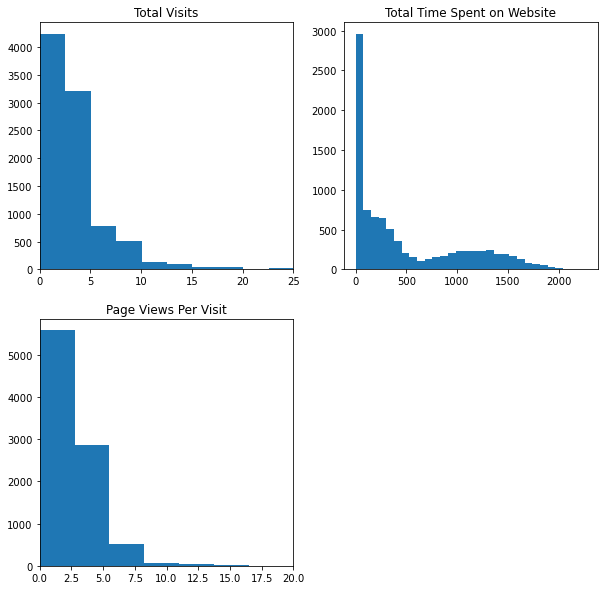

In [25]:
plt.figure(figsize = (10,10))
plt.subplot(221)
plt.hist(dfinal['TotalVisits'], bins = 100)
plt.title('Total Visits')
plt.xlim(0,25)

plt.subplot(222)
plt.hist(dfinal['Total Time Spent on Website'], bins = 30)
plt.title('Total Time Spent on Website')

plt.subplot(223)
plt.hist(dfinal['Page Views Per Visit'], bins = 20)
plt.title('Page Views Per Visit')
plt.xlim(0,20)
plt.show()
    

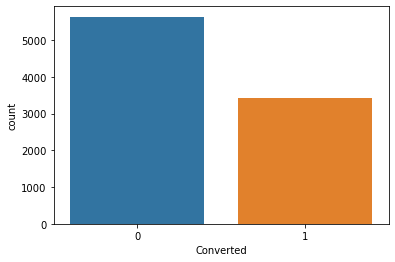

In [26]:
sns.countplot(dfinal['Converted'])
plt.show()

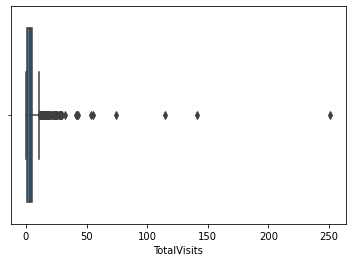

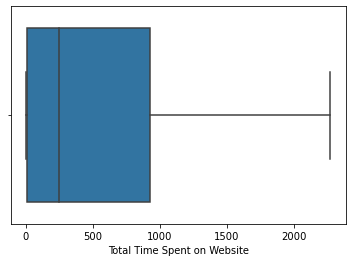

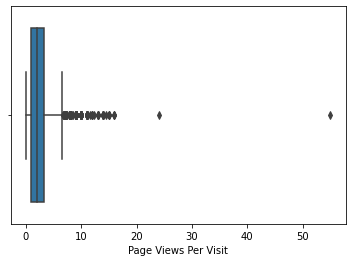

In [27]:
# Checking for Outliers

List1=["TotalVisits","Total Time Spent on Website","Page Views Per Visit"]

for i in List1:
    sns.boxplot(dfinal[i])
    plt.show()


In [28]:
dfp = dfinal[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']]
dfp.describe(percentiles=[0.25,0.5,0.75,0.9,0.99])

TotalVisits  Total Time Spent on Website  Page Views Per Visit
count  9074.000000                  9074.000000           9074.000000
mean      3.456028                   482.887481              2.370151
std       4.858802                   545.256560              2.160871
min       0.000000                     0.000000              0.000000
25%       1.000000                    11.000000              1.000000
50%       3.000000                   246.000000              2.000000
75%       5.000000                   922.750000              3.200000
90%       7.000000                  1373.000000              5.000000
99%      17.000000                  1839.000000              9.000000
max     251.000000                  2272.000000             55.000000

#### No need to remove outliers in 'Total visits' and 'Page views per visit' because it's doesn't effecting mean to large extent.

#### Categorical Variables

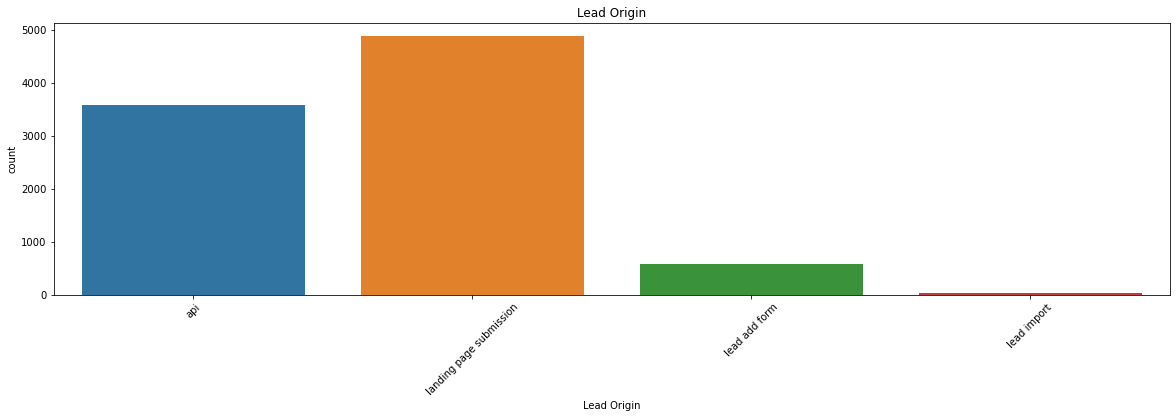

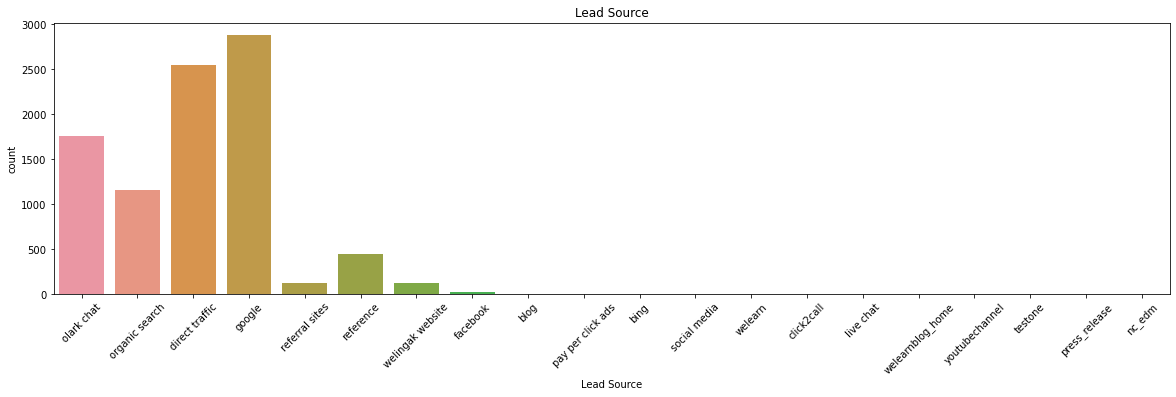

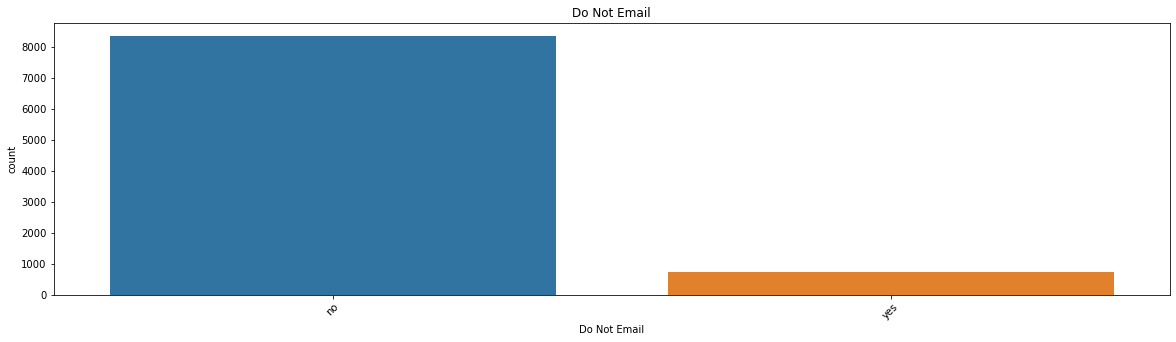

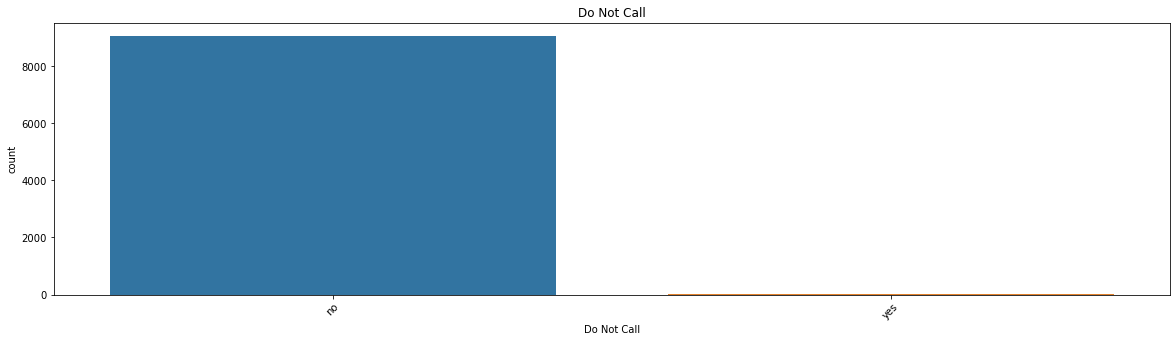

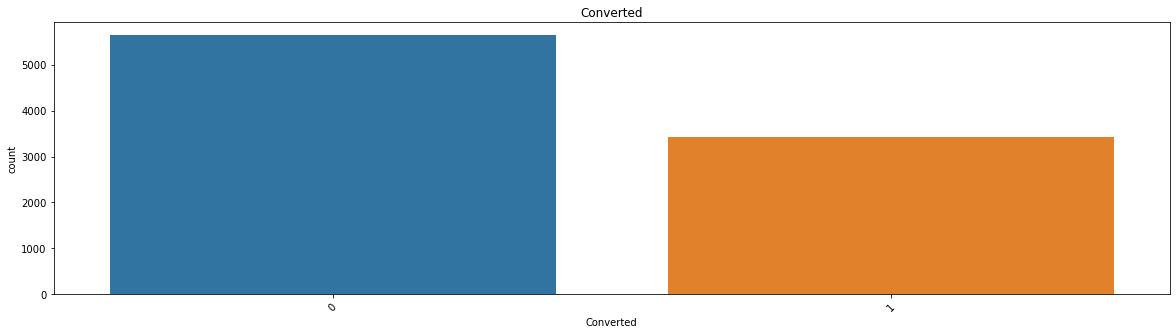

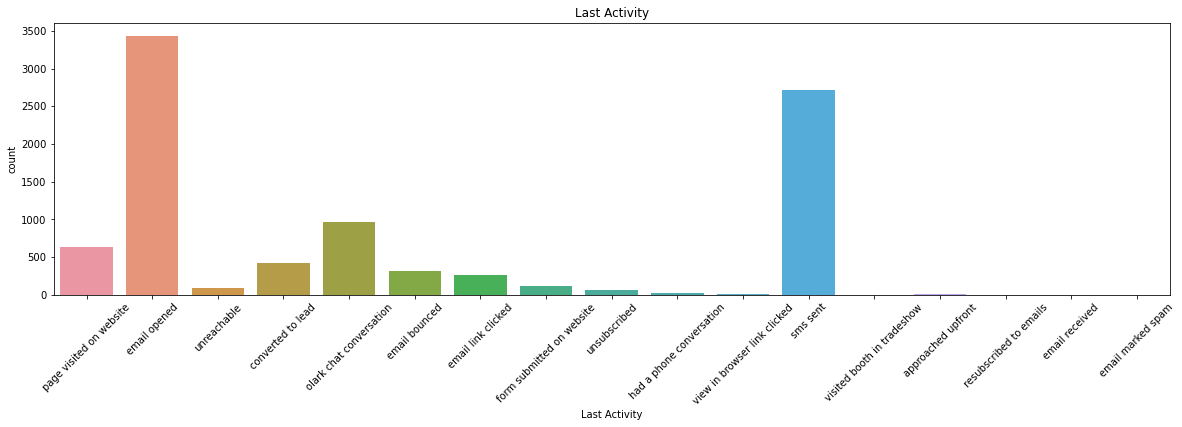

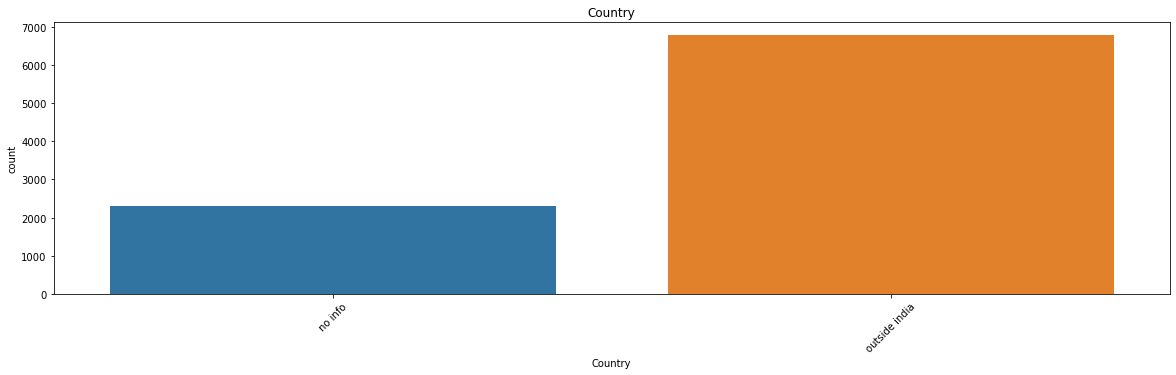

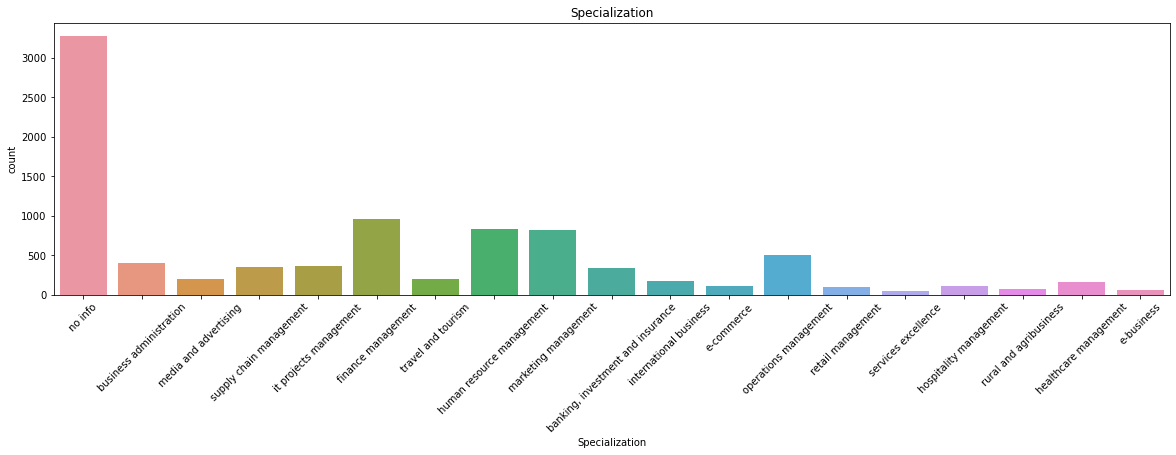

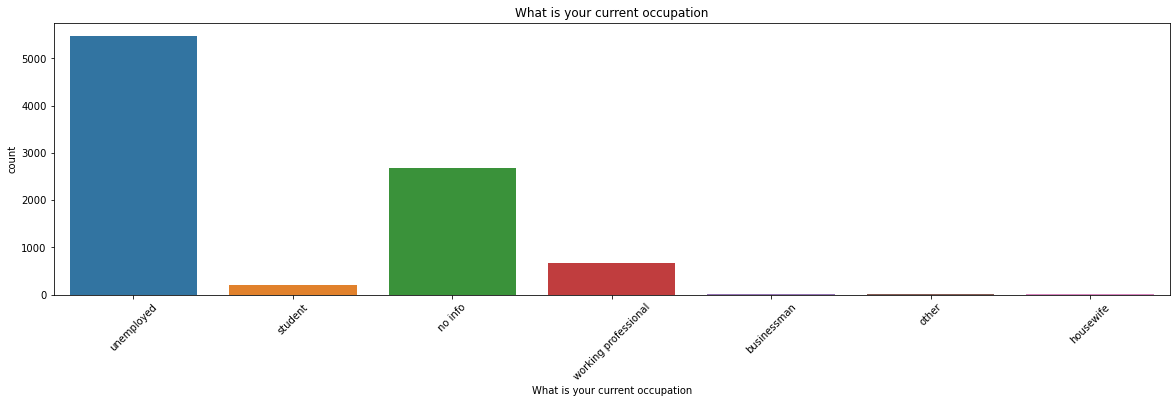

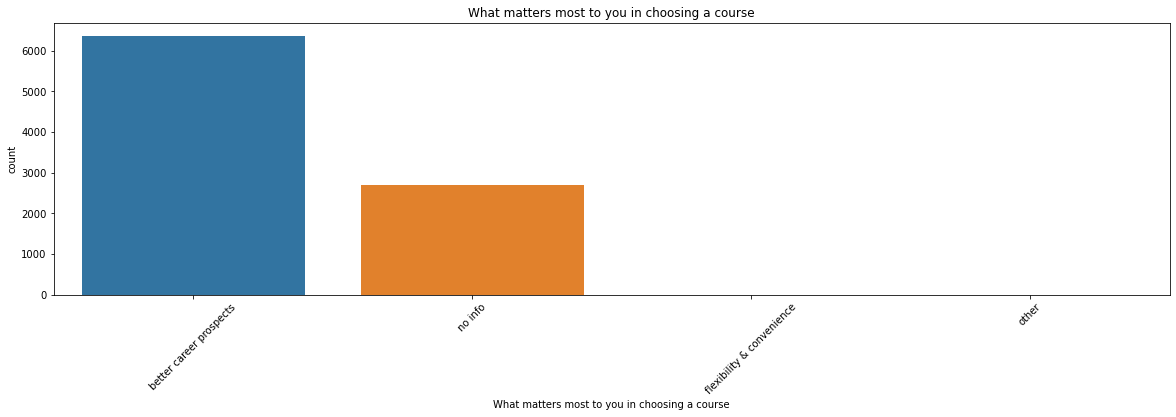

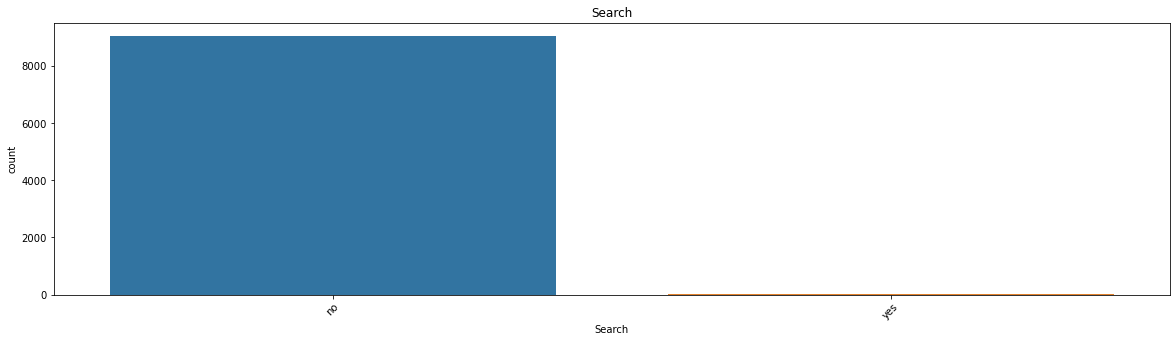

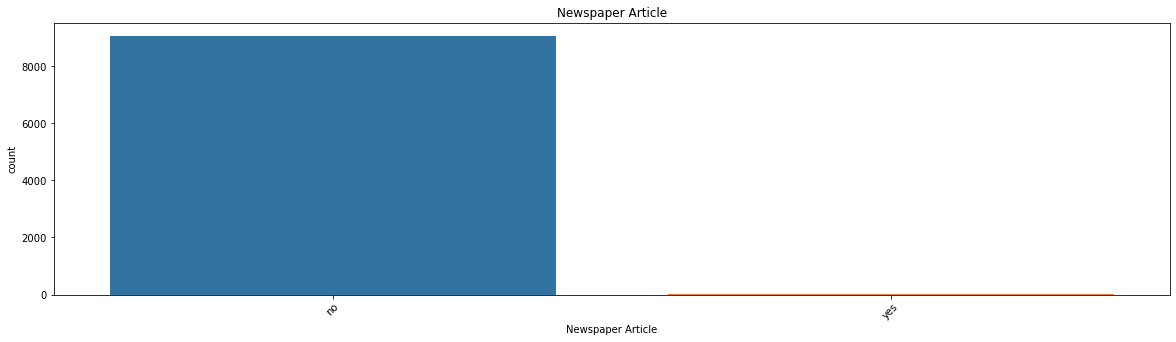

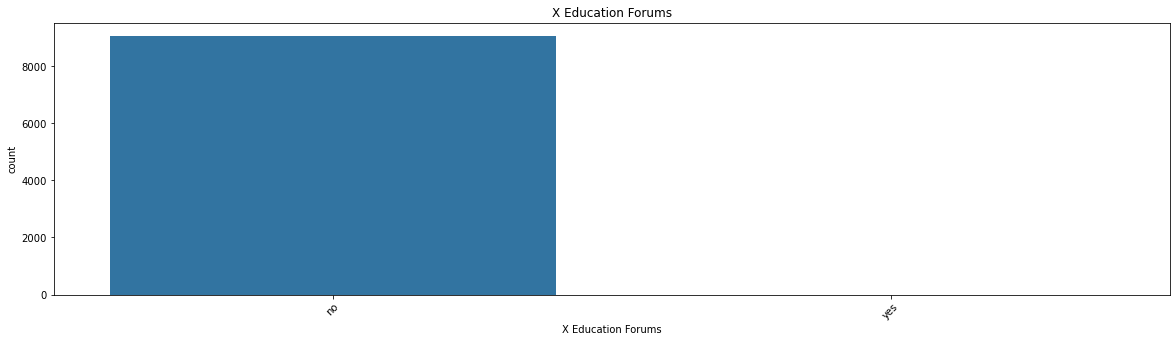

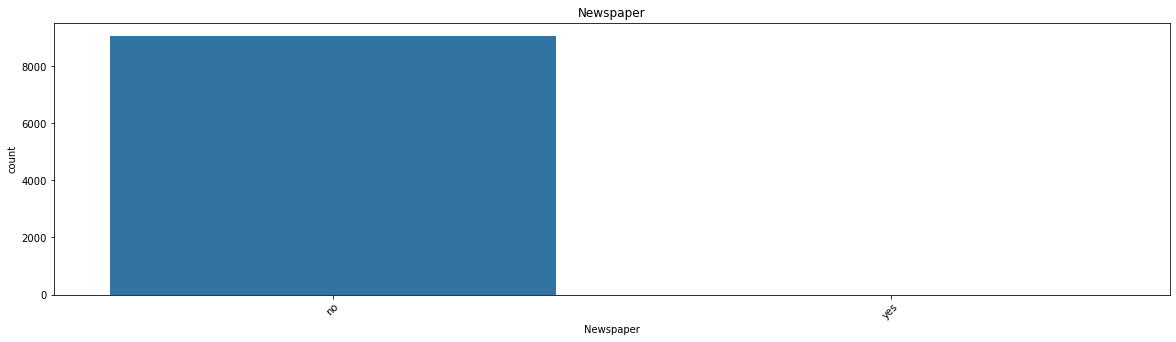

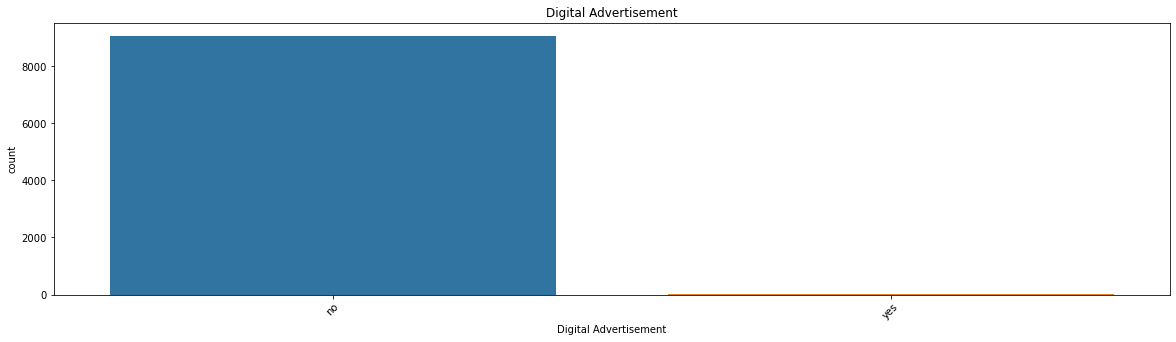

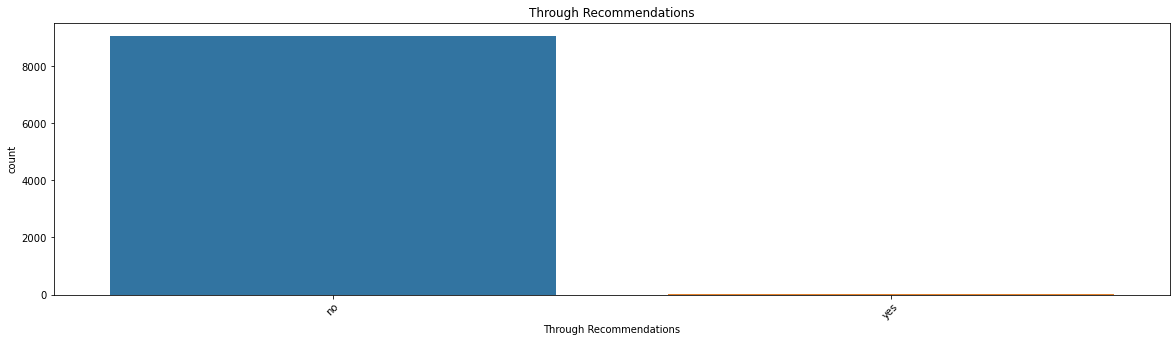

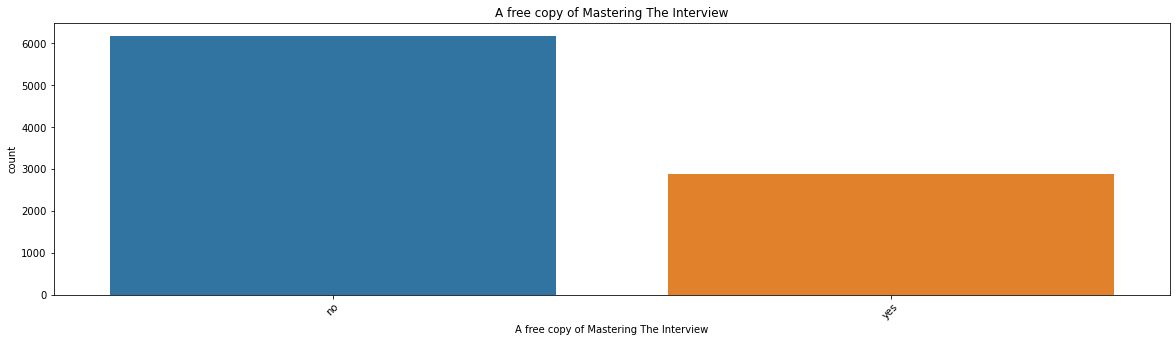

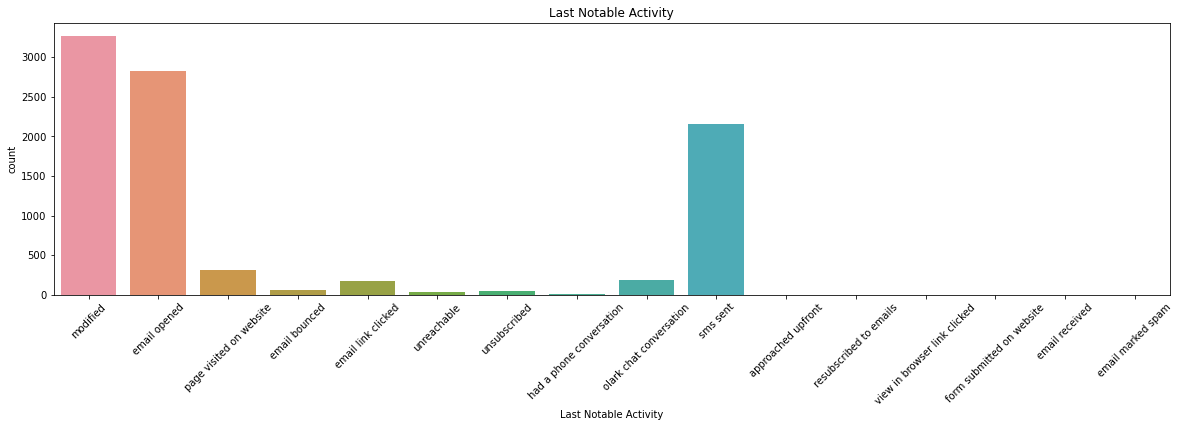

In [29]:
List1=['Lead Origin', 'Lead Source', 'Do Not Email', 'Do Not Call','Converted','Last Activity','Country','Specialization','What is your current occupation','What matters most to you in choosing a course', 'Search','Newspaper Article', 'X Education Forums', 'Newspaper','Digital Advertisement', 'Through Recommendations','A free copy of Mastering The Interview', 'Last Notable Activity']

for i in List1:
    plt.figure(figsize = (20,5))
    sns.countplot(dfinal[i]).tick_params(axis='x', rotation = 45)
    plt.title(i)
    plt.show()

### Bivariate Analysis

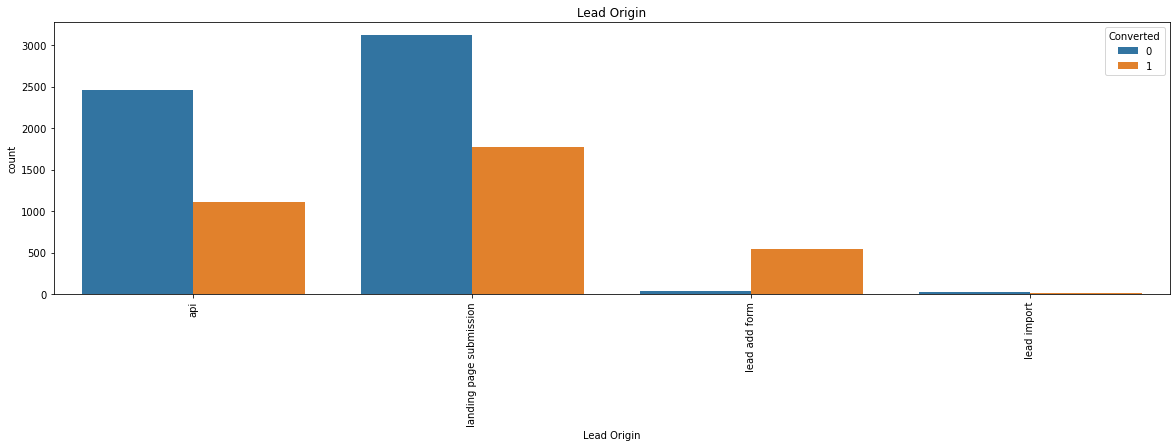

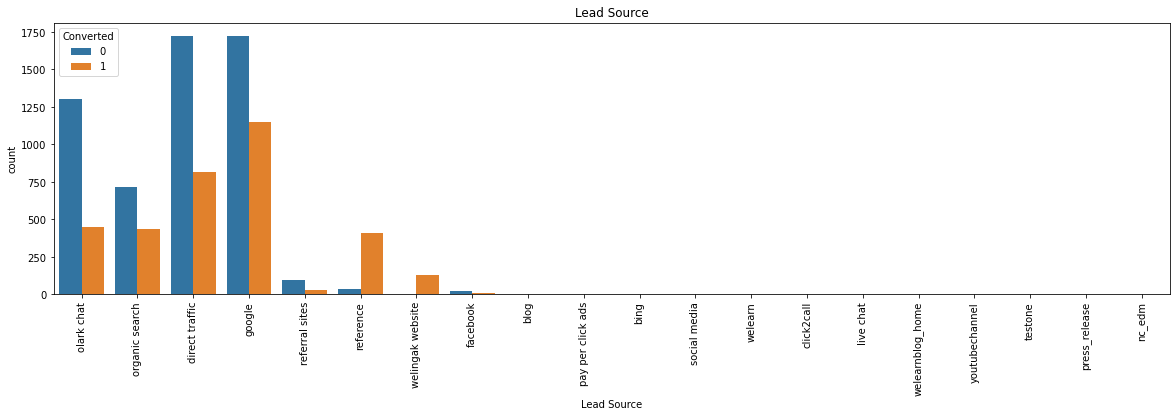

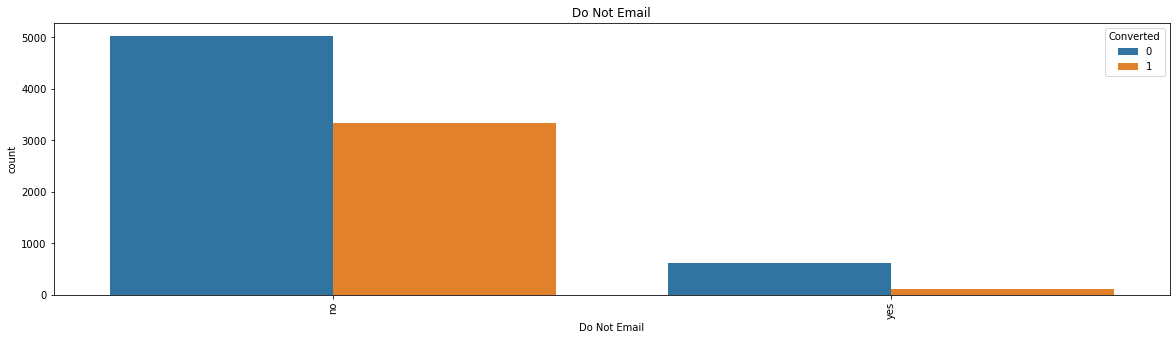

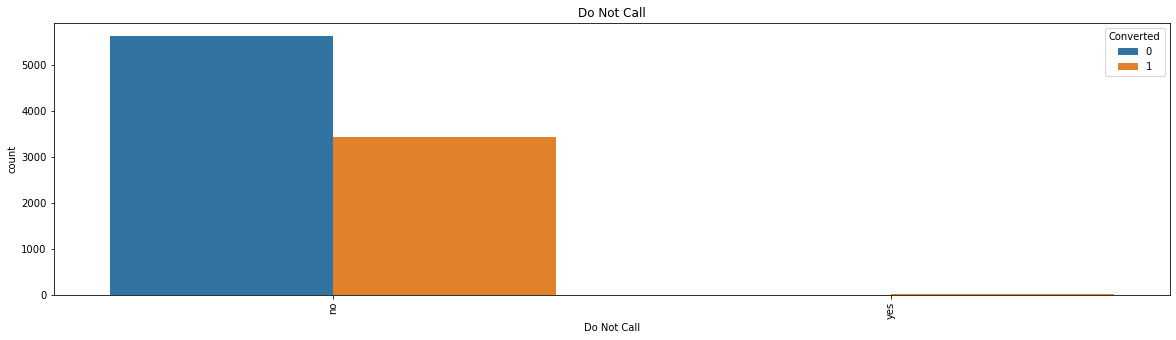

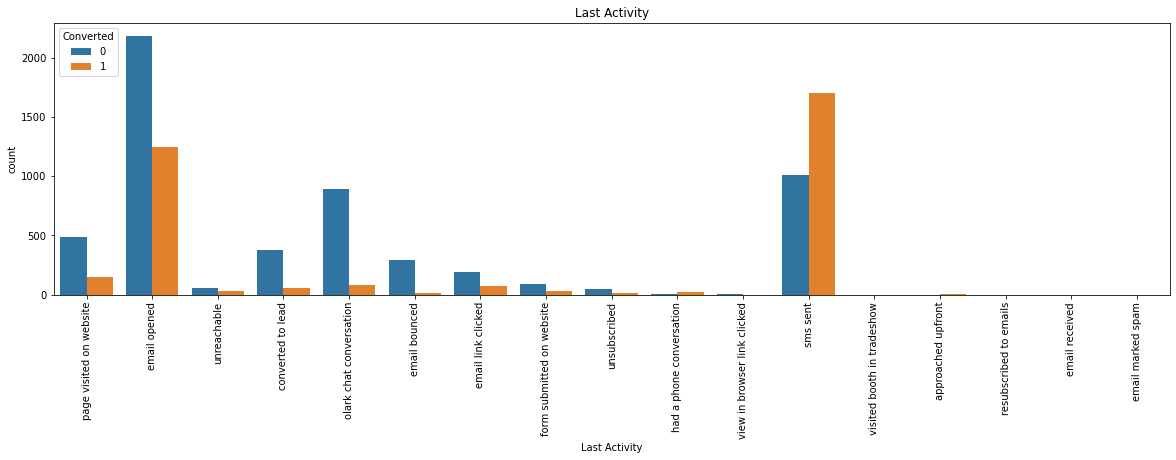

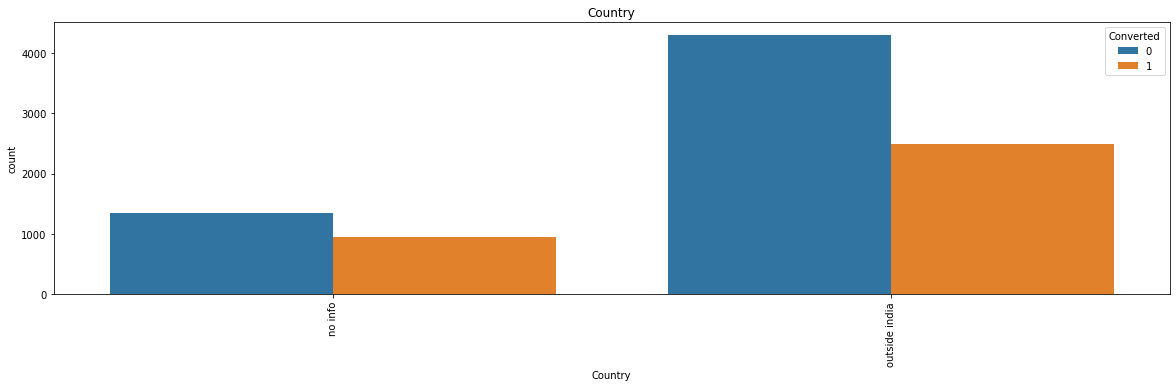

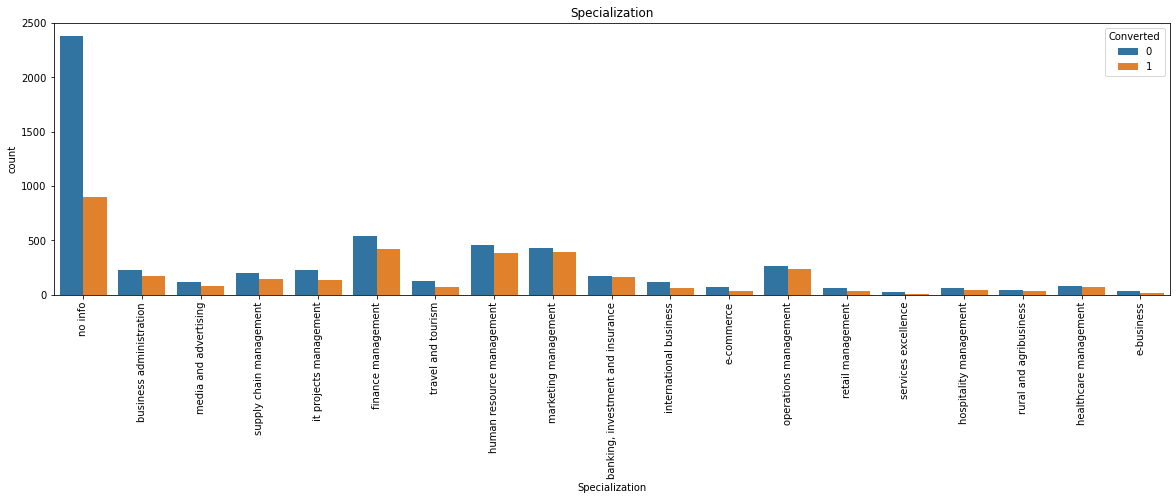

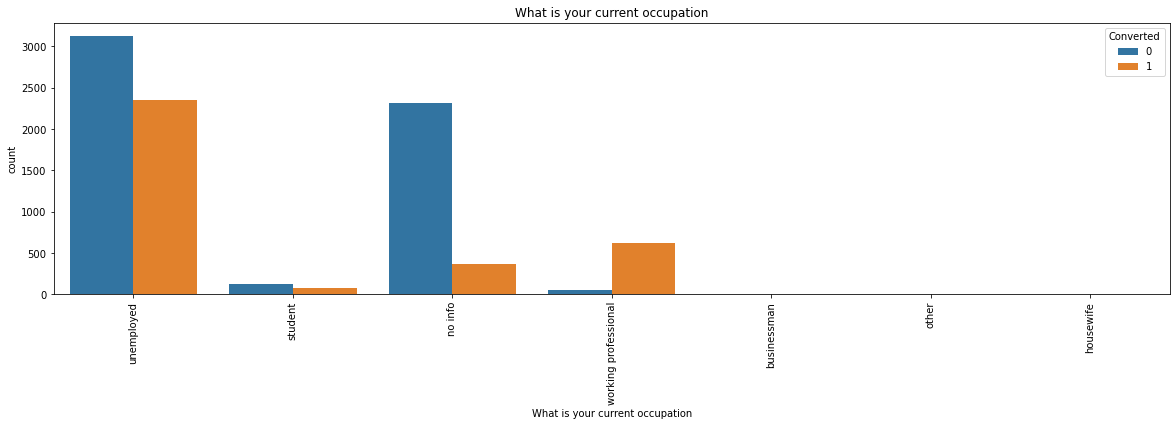

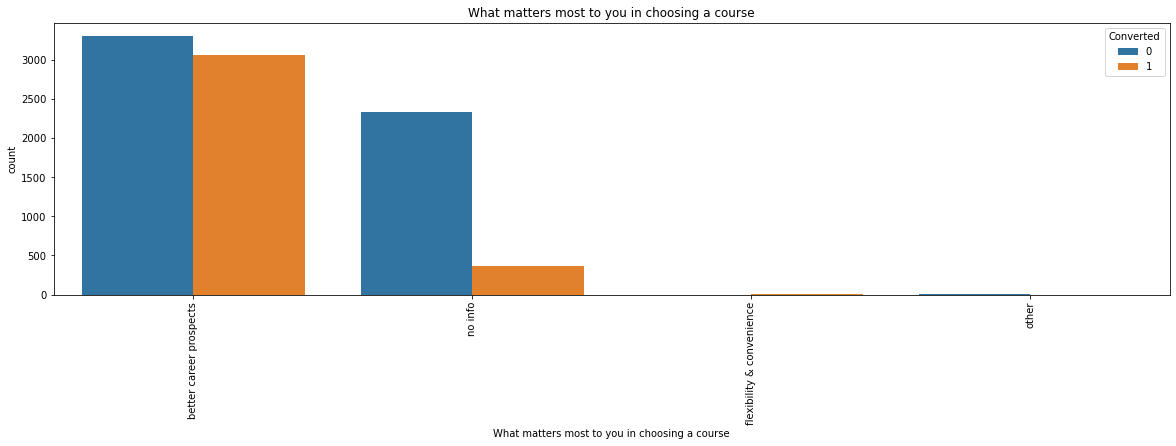

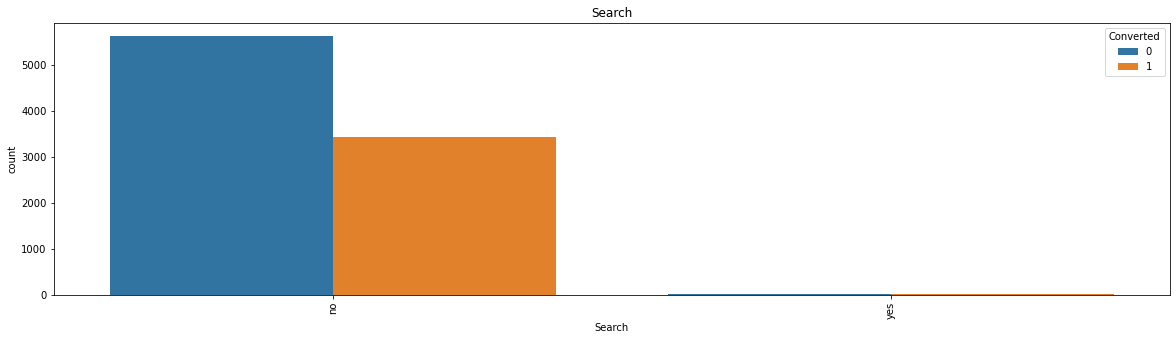

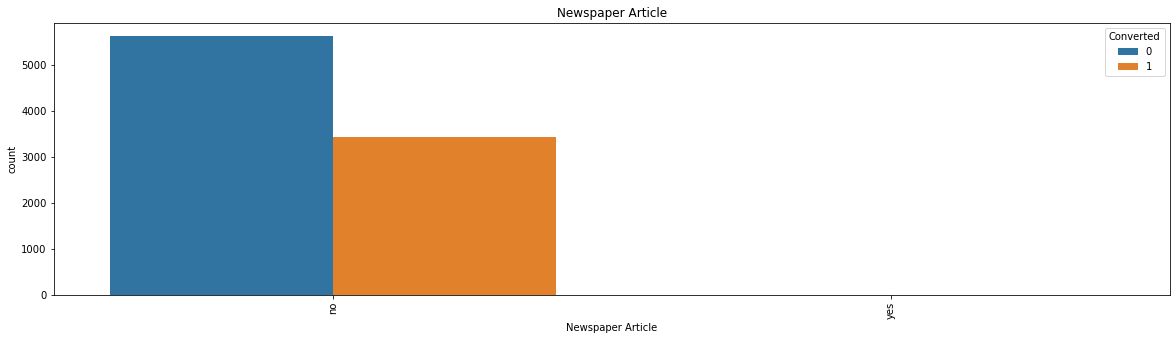

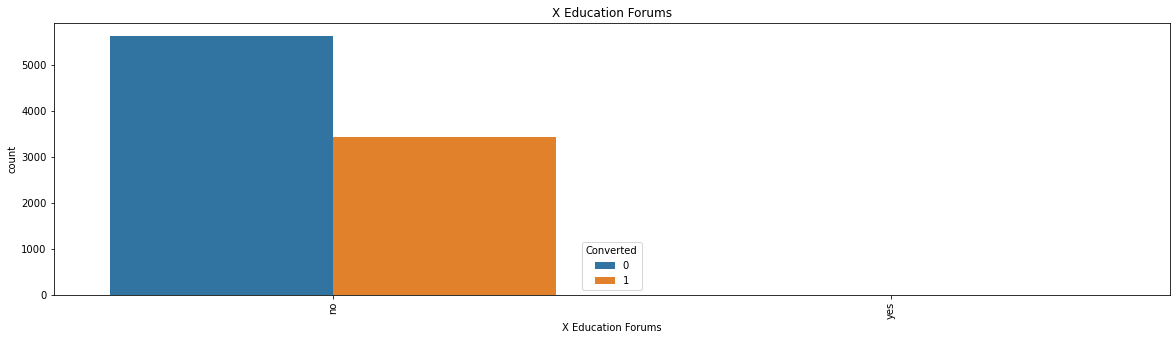

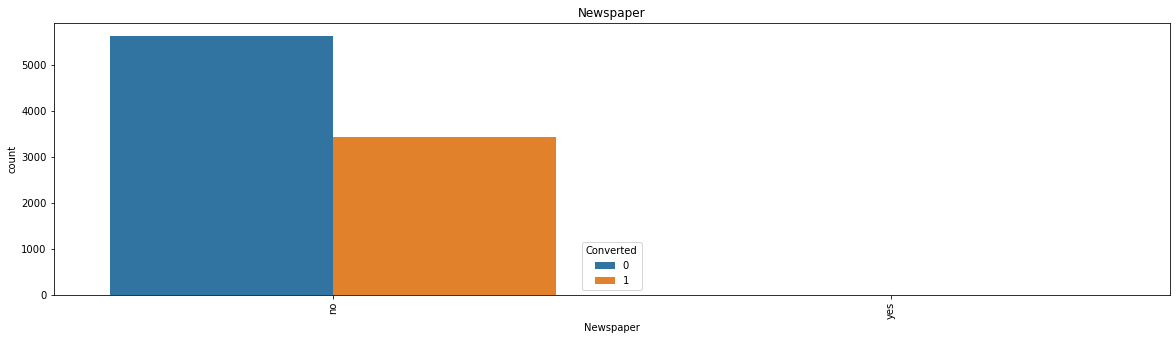

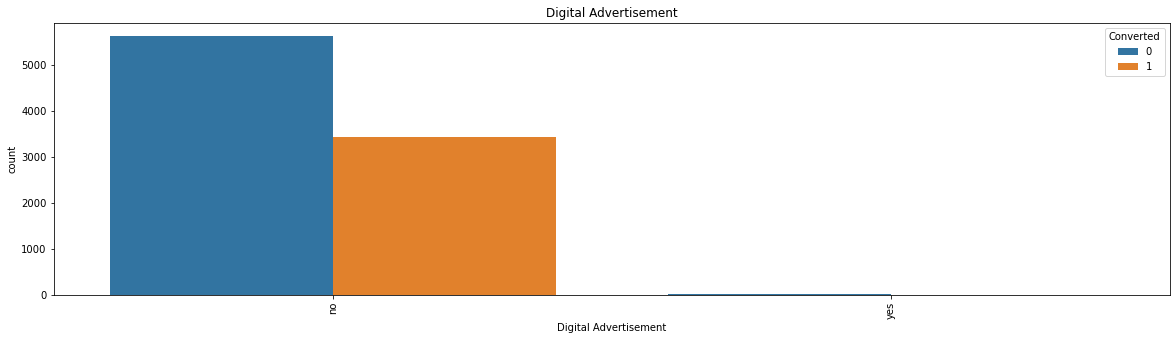

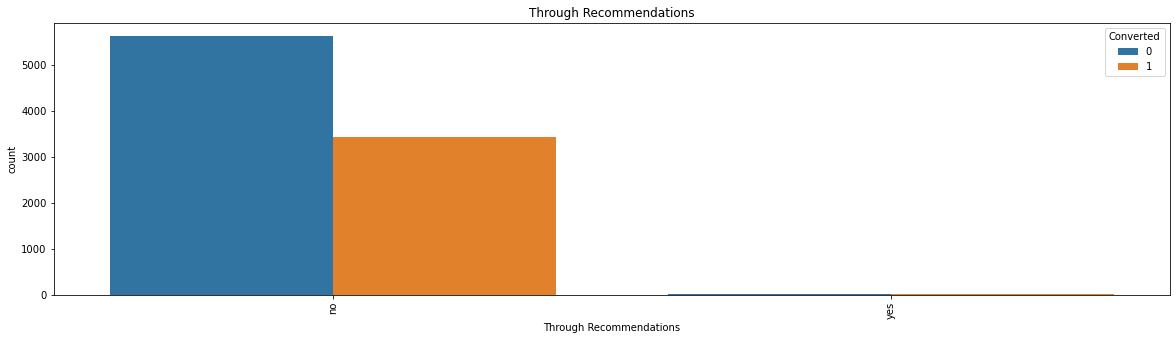

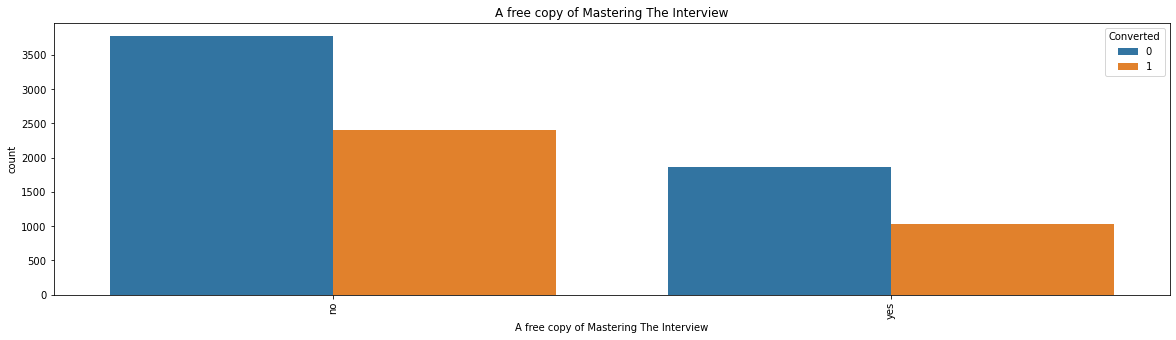

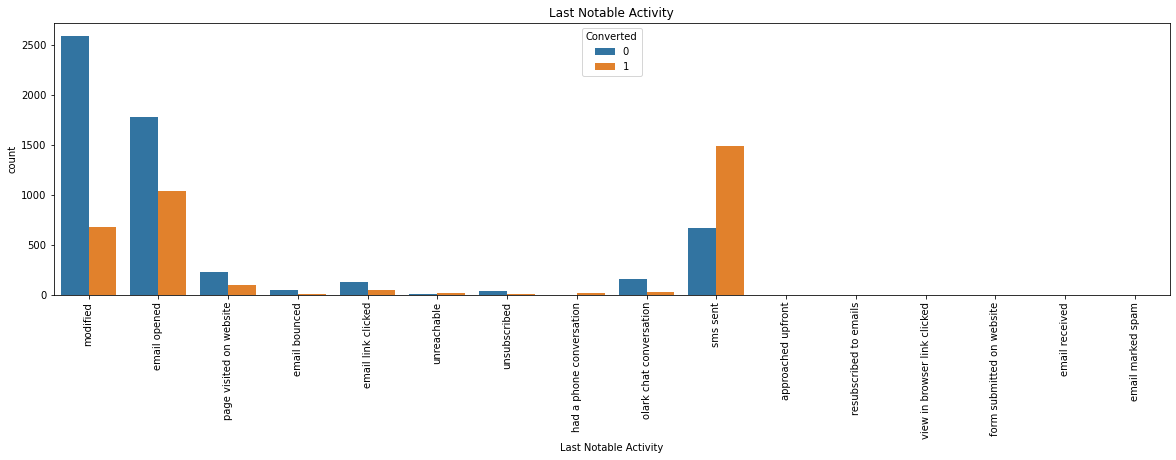

In [30]:
List1=['Lead Origin', 'Lead Source', 'Do Not Email', 'Do Not Call','Last Activity','Country','Specialization','What is your current occupation','What matters most to you in choosing a course', 'Search','Newspaper Article', 'X Education Forums', 'Newspaper','Digital Advertisement', 'Through Recommendations','A free copy of Mastering The Interview', 'Last Notable Activity']

for i in List1:
    plt.figure(figsize = (20,5))
    sns.countplot(x=i, hue='Converted', data= dfinal).tick_params(axis='x', rotation = 90)
    plt.title(i)
    plt.show()

#### 1.) When we saw lead origin graph, we can observe that lead came through 'Lead Add Form' have more conversion rate.
#### 2.) In 'Lead Source' graph, we can observe that 'Google', 'Reference' have good conversion.
#### 3.) In 'Do Not Mail' and 'Do Not Call' graph, we can observe that for input 'No' lead have more conversion.
#### 4.) In 'Last Activity' graph, for input 'Email Opened' and 'SMS Sent' conversion is good.
#### 5.) In 'What is your current occupation' graph, for 'Unemployed' and 'Working Professional' conversion is good.
#### 6.) In 'What matters most to you in choosing a course' graph, for input 'Better Career Prospects' conversion is good.
#### 7.) In 'Last Notable Activity' graph, for input 'SMS Sent' conversion is good.

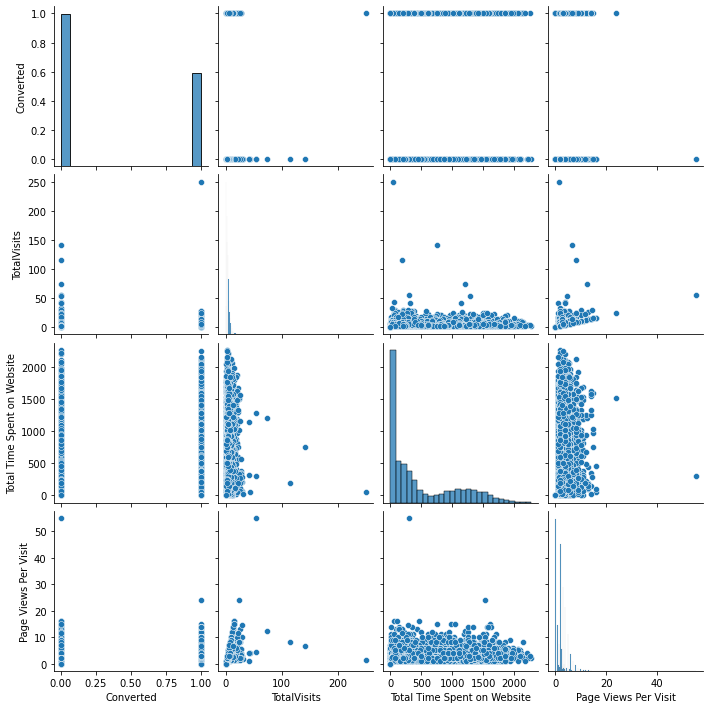

In [31]:
# Checking Corelation between Numerical variables

sns.pairplot(data=dfinal, vars=("Converted","TotalVisits","Total Time Spent on Website","Page Views Per Visit"))
plt.show()

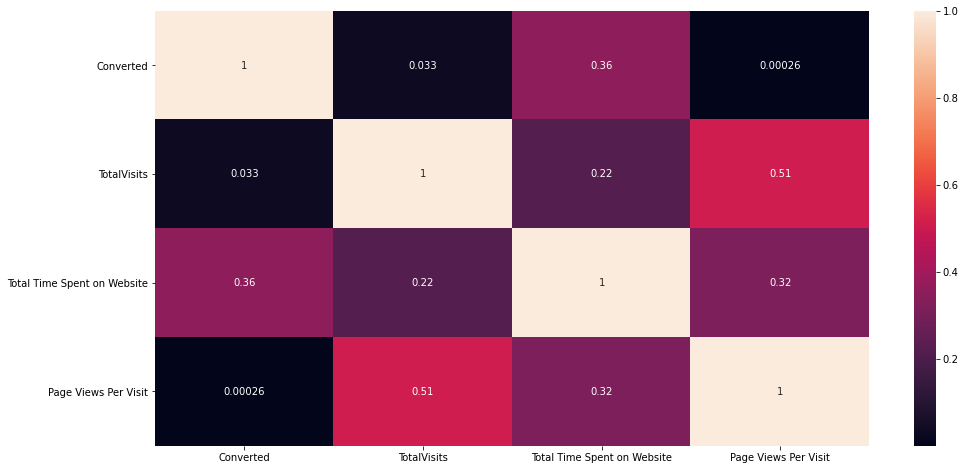

In [32]:
# Heat map

plt.figure(figsize=(16,8))
sns.heatmap(dfinal.corr(), annot=True)
plt.show()


#### As we can see through heat map there will be no high correlation, only 'page Views Per Visit' and 'Total Visits' have correlation greater than 0.5.

### Creating Dummy Variables

In [33]:
dfinal.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9074 entries, 0 to 9239
Data columns (total 21 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Lead Origin                                    9074 non-null   object 
 1   Lead Source                                    9074 non-null   object 
 2   Do Not Email                                   9074 non-null   object 
 3   Do Not Call                                    9074 non-null   object 
 4   Converted                                      9074 non-null   int64  
 5   TotalVisits                                    9074 non-null   float64
 6   Total Time Spent on Website                    9074 non-null   int64  
 7   Page Views Per Visit                           9074 non-null   float64
 8   Last Activity                                  9074 non-null   object 
 9   Country                                        9074 

In [34]:
dfinal.loc[:, dfinal.dtypes == 'object'].columns

Index(['Lead Origin', 'Lead Source', 'Do Not Email', 'Do Not Call',
       'Last Activity', 'Country', 'Specialization',
       'What is your current occupation',
       'What matters most to you in choosing a course', 'Search',
       'Newspaper Article', 'X Education Forums', 'Newspaper',
       'Digital Advertisement', 'Through Recommendations',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

In [35]:
# Creaing dummy variables

dummy = pd.get_dummies(dfinal[['Lead Origin','Specialization' ,'Lead Source', 'Do Not Email', 'Last Activity', 'What is your current occupation','A free copy of Mastering The Interview', 'Last Notable Activity']], drop_first=True)


In [36]:
# Adding dummy variables to dfinal dataset
dfinal1 = pd.concat([dfinal, dummy], axis=1)
dfinal1

Lead Origin     Lead Source Do Not Email Do Not Call  \
0                         api      olark chat           no          no   
1                         api  organic search           no          no   
2     landing page submission  direct traffic           no          no   
3     landing page submission  direct traffic           no          no   
4     landing page submission          google           no          no   
...                       ...             ...          ...         ...   
9235  landing page submission  direct traffic          yes          no   
9236  landing page submission  direct traffic           no          no   
9237  landing page submission  direct traffic          yes          no   
9238  landing page submission          google           no          no   
9239  landing page submission  direct traffic           no          no   

      Converted  TotalVisits  Total Time Spent on Website  \
0             0          0.0                            0   
1             0          5.0                          674   
2             1          2.0                         1532   
3             0          1.0                          305   
4             1          2.0                         1428   
...         ...          ...                          ...   
9235          1          8.0                         1845   
9236          0          2.0                          238   
9237          0          2.0                          199   
9238          1          3.0                          499   
9239          1          6.0                         1279   

      Page Views Per Visit            Last Activity        Country  ...  \
0                     0.00  page visited on website        no info  ...   
1                     2.50             email opened  outside india  ...   
2                     2.00             email opened  outside india  ...   
3                     1.00              unreachable  outside india  ...   
4                     1.00        converted to lead  outside india  ...   
...                    ...                      ...            ...  ...   
9235                  2.67        email marked spam  outside india  ...   
9236                  2.00                 sms sent  outside india  ...   
9237                  2.00                 sms sent  outside india  ...   
9238                  3.00                 sms sent  outside india  ...   
9239                  3.00                 sms sent  outside india  ...   

     Last Notable Activity_form submitted on website  \
0                                                  0   
1                                                  0   
2                                                  0   
3                                                  0   
4                                                  0   
...                                              ...   
9235                                               0   
9236                                               0   
9237                                               0   
9238                                               0   
9239                                               0   

     Last Notable Activity_had a phone conversation  \
0                                                 0   
1                                                 0   
2                                                 0   
3                                                 0   
4                                                 0   
...                                             ...   
9235                                              0   
9236                                              0   
9237                                              0   
9238                                              0   
9239                                              0   

     Last Notable Activity_modified  \
0                                 1   
1                                 0   
2                                 0   
3    

In [37]:
dfinal1.columns

Index(['Lead Origin', 'Lead Source', 'Do Not Email', 'Do Not Call',
       'Converted', 'TotalVisits', 'Total Time Spent on Website',
       'Page Views Per Visit', 'Last Activity', 'Country', 'Specialization',
       'What is your current occupation',
       'What matters most to you in choosing a course', 'Search',
       'Newspaper Article', 'X Education Forums', 'Newspaper',
       'Digital Advertisement', 'Through Recommendations',
       'A free copy of Mastering The Interview', 'Last Notable Activity',
       'Lead Origin_landing page submission', 'Lead Origin_lead add form',
       'Lead Origin_lead import', 'Specialization_business administration',
       'Specialization_e-business', 'Specialization_e-commerce',
       'Specialization_finance management',
       'Specialization_healthcare management',
       'Specialization_hospitality management',
       'Specialization_human resource management',
       'Specialization_international business',
       'Specialization_it proje

In [38]:
dfinal1 = dfinal1.drop(['What is your current occupation_no info','Lead Origin', 'Lead Source', 'Do Not Email', 'Do Not Call','Last Activity', 'Country', 'Specialization', 'Specialization_no info','What is your current occupation','What matters most to you in choosing a course', 'Search','Newspaper Article', 'X Education Forums', 'Newspaper','Digital Advertisement', 'Through Recommendations','A free copy of Mastering The Interview', 'Last Notable Activity'], 1)
dfinal1

Converted  TotalVisits  Total Time Spent on Website  \
0             0          0.0                            0   
1             0          5.0                          674   
2             1          2.0                         1532   
3             0          1.0                          305   
4             1          2.0                         1428   
...         ...          ...                          ...   
9235          1          8.0                         1845   
9236          0          2.0                          238   
9237          0          2.0                          199   
9238          1          3.0                          499   
9239          1          6.0                         1279   

      Page Views Per Visit  Lead Origin_landing page submission  \
0                     0.00                                    0   
1                     2.50                                    0   
2                     2.00                                    1   
3                     1.00                                    1   
4                     1.00                                    1   
...                    ...                                  ...   
9235                  2.67                                    1   
9236                  2.00                                    1   
9237                  2.00                                    1   
9238                  3.00                                    1   
9239                  3.00                                    1   

      Lead Origin_lead add form  Lead Origin_lead import  \
0                             0                        0   
1                             0                        0   
2                             0                        0   
3                             0                        0   
4                             0                        0   
...                         ...                      ...   
9235                          0                        0   
9236                          0                        0   
9237                          0                        0   
9238                          0                        0   
9239                          0                        0   

      Specialization_business administration  Specialization_e-business  \
0                                          0                          0   
1                                          0                          0   
2                                          1                          0   
3                                          0                          0   
4                                          0                          0   
...                                      ...                        ...   
9235                                       0                          0   
9236                                       0                          0   
9237                                       1                          0   
9238                                       0                          0   
9239                                       0                          0   

      Specialization_e-commerce  ...  \
0                             0  ...   
1                             0  ...   
2                             0  ...   
3                             0  ...   
4                             0  ...   
...                         ...  ...   
9235                          0  ...   
9236                          0  ...   
9237                          0  ...   
9238                          0  ...   
9239                          0  ...   

      Last Notable Activity_form submitted on website  \
0                                                   0   
1                                                   0   
2                                                   0   
3                                                   0   
4                                                   0   
...                    

### Train-Test Split

In [39]:
X = dfinal1.drop(['Converted'], 1)
y = dfinal1['Converted']
X.head()

TotalVisits  Total Time Spent on Website  Page Views Per Visit  \
0          0.0                            0                   0.0   
1          5.0                          674                   2.5   
2          2.0                         1532                   2.0   
3          1.0                          305                   1.0   
4          2.0                         1428                   1.0   

   Lead Origin_landing page submission  Lead Origin_lead add form  \
0                                    0                          0   
1                                    0                          0   
2                                    1                          0   
3                                    1                          0   
4                                    1                          0   

   Lead Origin_lead import  Specialization_business administration  \
0                        0                                       0   
1                        0                                       0   
2                        0                                       1   
3                        0                                       0   
4                        0                                       0   

   Specialization_e-business  Specialization_e-commerce  \
0                          0                          0   
1                          0                          0   
2                          0                          0   
3                          0                          0   
4                          0                          0   

   Specialization_finance management  ...  \
0                                  0  ...   
1                                  0  ...   
2                                  0  ...   
3                                  0  ...   
4                                  0  ...   

   Last Notable Activity_form submitted on website  \
0                                                0   
1                                                0   
2                                                0   
3                                                0   
4                                                0   

   Last Notable Activity_had a phone conversation  \
0                                               0   
1                                               0   
2                                               0   
3                                               0   
4                                               0   

   Last Notable Activity_modified  \
0                               1   
1                               0   
2                               0   
3                               1   
4                               1   

   Last Notable Activity_olark chat conversation  \
0                                              0   
1                                              0   
2                                              0   
3                                              0   
4                                              0   

   Last Notable Activity_page visited on website  \
0                                              0   
1                                              0   
2                                              0   
3                                              0   
4                                              0   

   Last Notable Activity_resubscribed to emails  \
0                                             0   
1                                             0   
2                                             0   
3                                             0   
4                                             0   

   Last Notable Activity_sms sent  Last Notable Activity_unreachable  \
0                               0                                  0   
1                               0                                  0   
2                               0                                  0   
3                               0     

In [40]:
# Spliting the dataset into 70% and 30% for train and test respectively
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=10)

In [41]:
# Applying Scaler on three numeric features
scaler = MinMaxScaler()
X_train[['TotalVisits', 'Page Views Per Visit', 'Total Time Spent on Website']] = scaler.fit_transform(X_train[['TotalVisits', 'Page Views Per Visit', 'Total Time Spent on Website']])
X_train.head()

TotalVisits  Total Time Spent on Website  Page Views Per Visit  \
1289     0.014184                     0.612676              0.083333   
3604     0.000000                     0.000000              0.000000   
5584     0.042553                     0.751761              0.250000   
7679     0.000000                     0.000000              0.000000   
7563     0.014184                     0.787852              0.083333   

      Lead Origin_landing page submission  Lead Origin_lead add form  \
1289                                    1                          0   
3604                                    0                          0   
5584                                    1                          0   
7679                                    0                          0   
7563                                    1                          0   

      Lead Origin_lead import  Specialization_business administration  \
1289                        0                                       0   
3604                        0                                       0   
5584                        0                                       0   
7679                        0                                       0   
7563                        0                                       0   

      Specialization_e-business  Specialization_e-commerce  \
1289                          0                          0   
3604                          0                          0   
5584                          0                          0   
7679                          0                          0   
7563                          0                          0   

      Specialization_finance management  ...  \
1289                                  1  ...   
3604                                  0  ...   
5584                                  0  ...   
7679                                  0  ...   
7563                                  0  ...   

      Last Notable Activity_form submitted on website  \
1289                                                0   
3604                                                0   
5584                                                0   
7679                                                0   
7563                                                0   

      Last Notable Activity_had a phone conversation  \
1289                                               0   
3604                                               0   
5584                                               0   
7679                                               0   
7563                                               0   

      Last Notable Activity_modified  \
1289                               0   
3604                               0   
5584                               0   
7679                               0   
7563                               1   

      Last Notable Activity_olark chat conversation  \
1289                                              0   
3604                                              0   
5584                                              0   
7679                                              0   
7563                                              0   

      Last Notable Activity_page visited on website  \
1289                                              0   
3604                                              1   
5584                                              0   
7679                                              0   
7563                                              0   

      Last Notable Activity_resubscribed to emails  \
1289                                             0   
3604                                             0   
5584                                             0   
7679                                             0   
7563                                             0   

      Last Notable Activity_sms sent  Last Notable Activity_unreachable  \
1289                               0                    

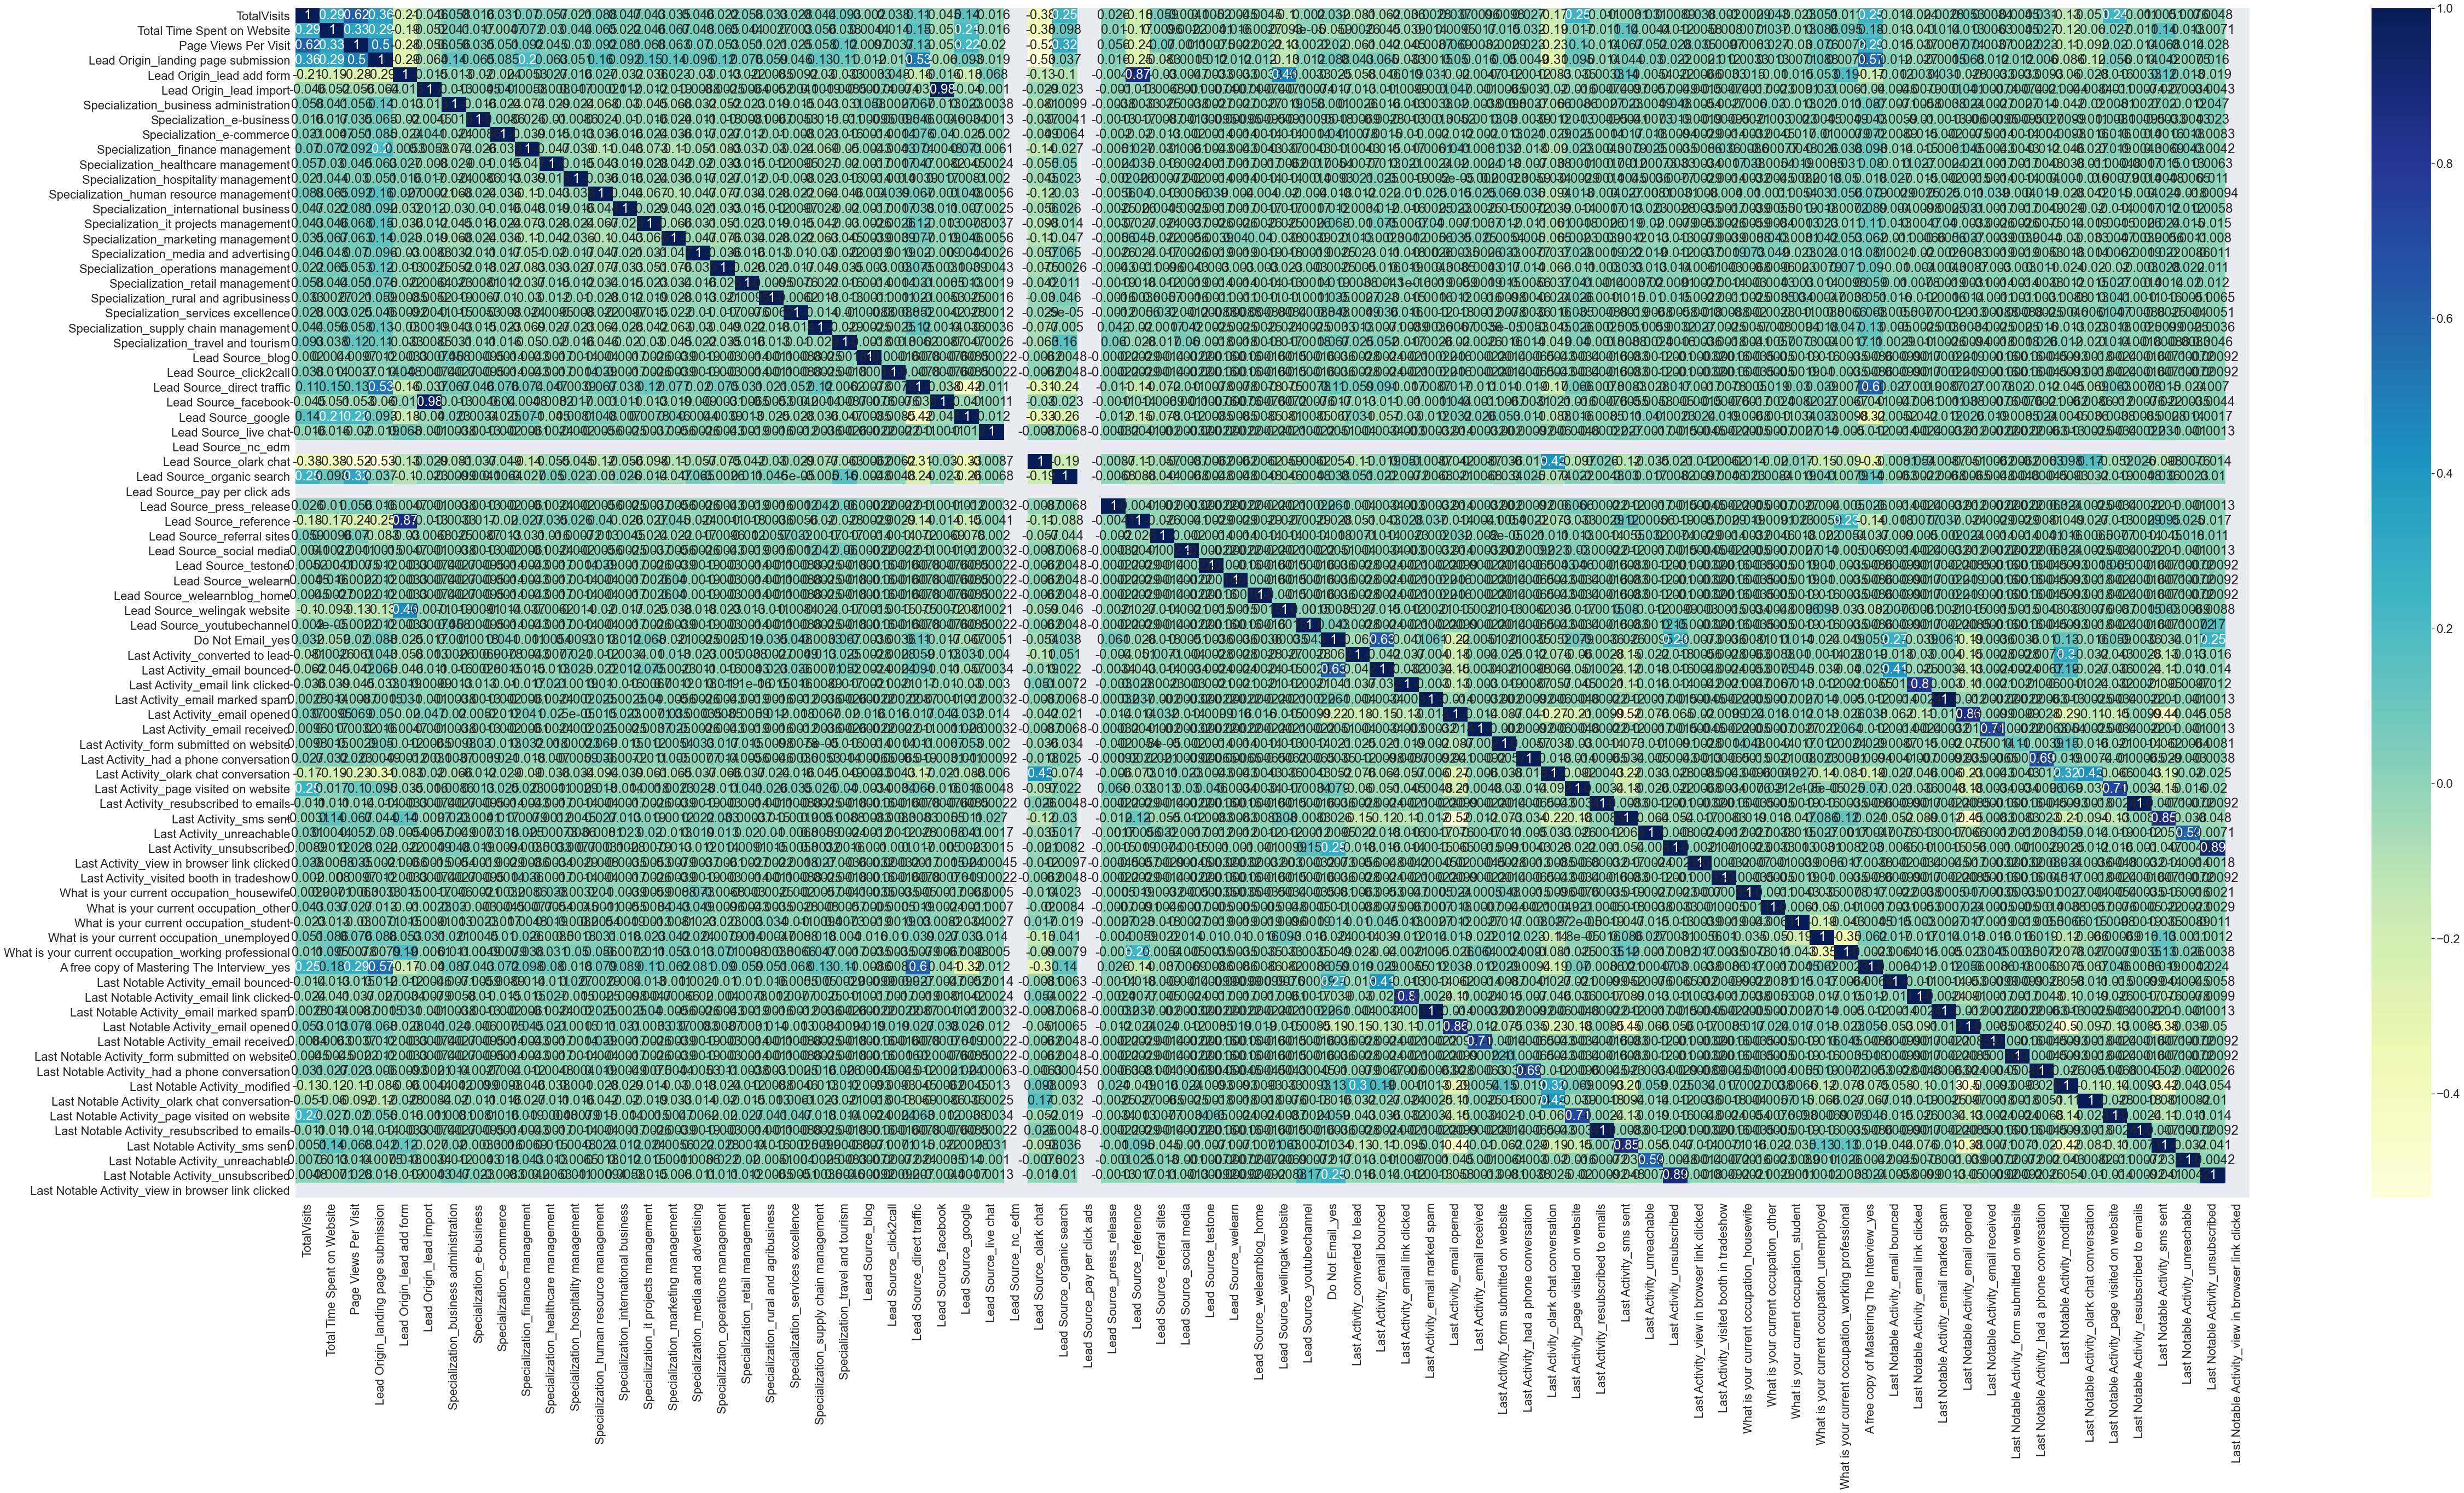

In [42]:
#Checking Correlation

plt.figure(figsize = (80, 40))
sns.set(font_scale=2)
sns.heatmap(X_train.corr(), annot = True, cmap="YlGnBu")

plt.show()

#### Lots of variables in data set not able to see correlation properly but some blocks have light blue and dark blue color that means they are highly correlated.

### Building Model

In [43]:
logreg = LogisticRegression()

In [44]:
# Now running RFE with 15 variables
rfe = RFE(logreg, 15)
rfe = rfe.fit(X_train, y_train)

In [45]:
# Features that have been selected by RFE
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('TotalVisits', True, 1),
 ('Total Time Spent on Website', True, 1),
 ('Page Views Per Visit', False, 4),
 ('Lead Origin_landing page submission', False, 26),
 ('Lead Origin_lead add form', True, 1),
 ('Lead Origin_lead import', False, 40),
 ('Specialization_business administration', False, 33),
 ('Specialization_e-business', False, 32),
 ('Specialization_e-commerce', False, 23),
 ('Specialization_finance management', False, 30),
 ('Specialization_healthcare management', False, 25),
 ('Specialization_hospitality management', False, 45),
 ('Specialization_human resource management', False, 31),
 ('Specialization_international business', False, 37),
 ('Specialization_it projects management', False, 28),
 ('Specialization_marketing management', False, 22),
 ('Specialization_media and advertising', False, 42),
 ('Specialization_operations management', False, 27),
 ('Specialization_retail management', False, 63),
 ('Specialization_rural and agribusiness', False, 24),
 ('Specialization_serv

In [46]:
# columns selected by RFE
col = X_train.columns[rfe.support_]
col

Index(['TotalVisits', 'Total Time Spent on Website',
       'Lead Origin_lead add form', 'Lead Source_olark chat',
       'Lead Source_welingak website', 'Do Not Email_yes',
       'Last Activity_olark chat conversation', 'Last Activity_sms sent',
       'What is your current occupation_housewife',
       'What is your current occupation_other',
       'What is your current occupation_student',
       'What is your current occupation_unemployed',
       'What is your current occupation_working professional',
       'Last Notable Activity_had a phone conversation',
       'Last Notable Activity_unreachable'],
      dtype='object')

In [47]:
X_train.columns[~rfe.support_]

Index(['Page Views Per Visit', 'Lead Origin_landing page submission',
       'Lead Origin_lead import', 'Specialization_business administration',
       'Specialization_e-business', 'Specialization_e-commerce',
       'Specialization_finance management',
       'Specialization_healthcare management',
       'Specialization_hospitality management',
       'Specialization_human resource management',
       'Specialization_international business',
       'Specialization_it projects management',
       'Specialization_marketing management',
       'Specialization_media and advertising',
       'Specialization_operations management',
       'Specialization_retail management',
       'Specialization_rural and agribusiness',
       'Specialization_services excellence',
       'Specialization_supply chain management',
       'Specialization_travel and tourism', 'Lead Source_blog',
       'Lead Source_click2call', 'Lead Source_direct traffic',
       'Lead Source_facebook', 'Lead Source_google'

In [48]:
# Creating dataframe with RFE selected variables

X_train = X_train[col]

In [49]:
# Importing Statsmodel
import statsmodels.api as sm

#Adding Constant variable
X_train_sm = sm.add_constant(X_train)
logm1 = sm.GLM(y_train, X_train_sm, family = sm.families.Binomial())
res = logm1.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6335
Model Family:                Binomial   Df Model:                           15
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2635.0
Date:                Mon, 17 Oct 2022   Deviance:                       5270.1
Time:                        03:04:58   Pearson chi2:                 6.48e+03
No. Iterations:                    22                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -3.4876      0.114    -30.661      0.000      -3.711      -3.265
TotalVisits                                              5.4367      1.437      3.782      0.000       2.619       8.254
Total Time Spent on Website                              4.6247      0.167     27.689      0.000       4.297       4.952
Lead Origin_lead add form                                3.7433      0.225     16.616      0.000       3.302       4.185
Lead Source_olark chat                                   1.5954      0.112     14.288      0.000       1.377       1.814
Lead Source_welingak website                             2.5982      1.033      2.515      0.012       0.574       4.623
Do Not Email_yes                                        -1.4275      0.170     -8.376      0.000      -1.762      -1.093
Last Activity_olark chat conversation                   -1.3875      0.168     -8.281      0.000      -1.716      -1.059
Last Activity_sms sent                                   1.2834      0.074     17.331      0.000       1.138       1.428
What is your current occupation_housewife               25.4080   3.09e+04      0.001      0.999   -6.05e+04    6.06e+04
What is your current occupation_other                    2.1868      0.755      2.895      0.004       0.706       3.667
What is your current occupation_student                  1.2705      0.227      5.604      0.000       0.826       1.715
What is your current occupation_unemployed               1.1800      0.086     13.680      0.000       1.011       1.349
What is your current occupation_working professional     3.7057      0.205     18.098      0.000       3.304       4.107
Last Notable Activity_had a phone conversation          24.0110   2.17e+04      0.001      0.999   -4.25e+04    4.26e+04
Last Notable Activity_unreachable                        1.8344      0.601      3.051      0.002       0.656       3.013
========================================================================================================================
"""

In [50]:
# Importing 'variance_inflation_factor'
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif


Features   VIF
11         What is your current occupation_unemployed  2.30
1                         Total Time Spent on Website  2.07
0                                         TotalVisits  1.85
2                           Lead Origin_lead add form  1.59
7                              Last Activity_sms sent  1.54
3                              Lead Source_olark chat  1.51
6               Last Activity_olark chat conversation  1.37
12  What is your current occupation_working profes...  1.32
4                        Lead Source_welingak website  1.31
5                                    Do Not Email_yes  1.06
10            What is your current occupation_student  1.05
9               What is your current occupation_other  1.01
14                  Last Notable Activity_unreachable  1.01
8           What is your current occupation_housewife  1.00
13     Last Notable Activity_had a phone conversation  1.00

#### VIF values are less than 5 for all variable but P values of 'What is your current occupation_Housewife' and 'Last Notable Activity_Had a Phone Conversation' are too much high building model with out them, let first drop one then if needed we drop another.

In [51]:
X_train.drop(['What is your current occupation_housewife'], axis = 1, inplace = True)

In [52]:
# Refit the model
X_train_sm = sm.add_constant(X_train)
logm2 = sm.GLM(y_train, X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6336
Model Family:                Binomial   Df Model:                           14
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2643.6
Date:                Mon, 17 Oct 2022   Deviance:                       5287.1
Time:                        03:04:58   Pearson chi2:                 6.50e+03
No. Iterations:                    21                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -3.4578      0.113    -30.612      0.000      -3.679      -3.236
TotalVisits                                              5.3758      1.432      3.754      0.000       2.569       8.182
Total Time Spent on Website                              4.6191      0.167     27.704      0.000       4.292       4.946
Lead Origin_lead add form                                3.7559      0.225     16.676      0.000       3.314       4.197
Lead Source_olark chat                                   1.5845      0.111     14.225      0.000       1.366       1.803
Lead Source_welingak website                             2.5819      1.033      2.500      0.012       0.557       4.606
Do Not Email_yes                                        -1.4311      0.170     -8.405      0.000      -1.765      -1.097
Last Activity_olark chat conversation                   -1.3930      0.167     -8.320      0.000      -1.721      -1.065
Last Activity_sms sent                                   1.2752      0.074     17.249      0.000       1.130       1.420
What is your current occupation_other                    2.1635      0.755      2.865      0.004       0.684       3.644
What is your current occupation_student                  1.2472      0.227      5.506      0.000       0.803       1.691
What is your current occupation_unemployed               1.1579      0.086     13.509      0.000       0.990       1.326
What is your current occupation_working professional     3.6818      0.204     18.007      0.000       3.281       4.083
Last Notable Activity_had a phone conversation          23.0067   1.32e+04      0.002      0.999   -2.58e+04    2.58e+04
Last Notable Activity_unreachable                        1.8246      0.601      3.036      0.002       0.647       3.003
========================================================================================================================
"""

In [53]:
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features   VIF
10         What is your current occupation_unemployed  2.30
1                         Total Time Spent on Website  2.06
0                                         TotalVisits  1.85
2                           Lead Origin_lead add form  1.58
7                              Last Activity_sms sent  1.54
3                              Lead Source_olark chat  1.51
6               Last Activity_olark chat conversation  1.37
11  What is your current occupation_working profes...  1.32
4                        Lead Source_welingak website  1.31
5                                    Do Not Email_yes  1.06
9             What is your current occupation_student  1.05
8               What is your current occupation_other  1.01
13                  Last Notable Activity_unreachable  1.01
12     Last Notable Activity_had a phone conversation  1.00

#### Need to drop 'Last Notable Activity_Had a Phone Conversation' as p value is high.

In [54]:
X_train.drop(['Last Notable Activity_had a phone conversation'], axis = 1, inplace = True)

In [55]:
# Refit the model
X_train_sm = sm.add_constant(X_train)
logm3 = sm.GLM(y_train, X_train_sm, family = sm.families.Binomial())
res = logm3.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6337
Model Family:                Binomial   Df Model:                           13
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2651.3
Date:                Mon, 17 Oct 2022   Deviance:                       5302.6
Time:                        03:04:58   Pearson chi2:                 6.50e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -3.4533      0.113    -30.579      0.000      -3.675      -3.232
TotalVisits                                              5.5427      1.444      3.838      0.000       2.712       8.373
Total Time Spent on Website                              4.6048      0.166     27.690      0.000       4.279       4.931
Lead Origin_lead add form                                3.7501      0.225     16.651      0.000       3.309       4.192
Lead Source_olark chat                                   1.5802      0.111     14.187      0.000       1.362       1.798
Lead Source_welingak website                             2.5821      1.033      2.500      0.012       0.558       4.607
Do Not Email_yes                                        -1.4360      0.170     -8.437      0.000      -1.770      -1.102
Last Activity_olark chat conversation                   -1.3974      0.167     -8.348      0.000      -1.725      -1.069
Last Activity_sms sent                                   1.2672      0.074     17.164      0.000       1.123       1.412
What is your current occupation_other                    2.1567      0.755      2.857      0.004       0.677       3.636
What is your current occupation_student                  1.2456      0.226      5.502      0.000       0.802       1.689
What is your current occupation_unemployed               1.1632      0.086     13.582      0.000       0.995       1.331
What is your current occupation_working professional     3.6797      0.204     18.008      0.000       3.279       4.080
Last Notable Activity_unreachable                        1.8153      0.601      3.022      0.003       0.638       2.993
========================================================================================================================
"""

In [56]:
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features   VIF
10         What is your current occupation_unemployed  2.30
1                         Total Time Spent on Website  2.06
0                                         TotalVisits  1.85
2                           Lead Origin_lead add form  1.58
7                              Last Activity_sms sent  1.53
3                              Lead Source_olark chat  1.51
6               Last Activity_olark chat conversation  1.37
11  What is your current occupation_working profes...  1.32
4                        Lead Source_welingak website  1.31
5                                    Do Not Email_yes  1.06
9             What is your current occupation_student  1.05
8               What is your current occupation_other  1.01
12                  Last Notable Activity_unreachable  1.01

#### All Variables VIF values less than 5 and P values are less than 0.05 so need to drop any variable.

### Creating Prediction

In [57]:
# Predicting the probabilities on the train set
y_train_pred = res.predict(X_train_sm)
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:13]

array([0.64788325, 0.13318019, 0.23294642, 0.13318019, 0.49508996,
       0.77776483, 0.16731088, 0.98274125, 0.77298038, 0.1492489 ,
       0.97627977, 0.89674639, 0.56941465])

In [58]:
#conversion rate and probablity of predicted ones
y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Conversion_Prob':y_train_pred})
y_train_pred_final.head()

Converted  Conversion_Prob
0          1         0.647883
1          0         0.133180
2          0         0.232946
3          0         0.133180
4          0         0.495090

In [59]:
# using lambda function to assign 0 if Conversion_prob less than 0.5 and 1 Conversion_prob Greater than 0.5 in new column Predicted

y_train_pred_final['Predicted'] = y_train_pred_final.Conversion_Prob.map(lambda x: 1 if x > 0.5 else 0)
y_train_pred_final.head()

Converted  Conversion_Prob  Predicted
0          1         0.647883          1
1          0         0.133180          0
2          0         0.232946          0
3          0         0.133180          0
4          0         0.495090          0

### Evaluating Model

In [60]:
# Importing metrics from sklearn for evaluation
from sklearn import metrics

In [61]:
# Creating confusion matrix 
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.Predicted )
confusion

array([[3437,  458],
       [ 747, 1709]], dtype=int64)

In [62]:
# Actual/Predicted     not_churn    churn
        # not_churn        3437      458
        # churn            747       1709  

In [63]:
# overall accuracy
metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.Predicted)

0.810266099826799

#### 81% overall Accuracy

In [64]:
# true positive
TP = confusion[1,1]
# true negatives
TN = confusion[0,0]
# false positives
FP = confusion[0,1] 
# false negatives
FN = confusion[1,0]

In [65]:
# specificity
TN/(TN+FP)

0.8824133504492939

In [66]:
# sensitivity
TP/(TP+FN)

0.6958469055374593

#### Currently on 0.5 cut off we have around 81% accuracy, sensitivity of around 69.5% and specificity of around 88%.

### ROC Curve for Optimum Cut off value

In [67]:
# ROC function
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(7, 7))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [68]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Converted, y_train_pred_final.Conversion_Prob, drop_intermediate = False )

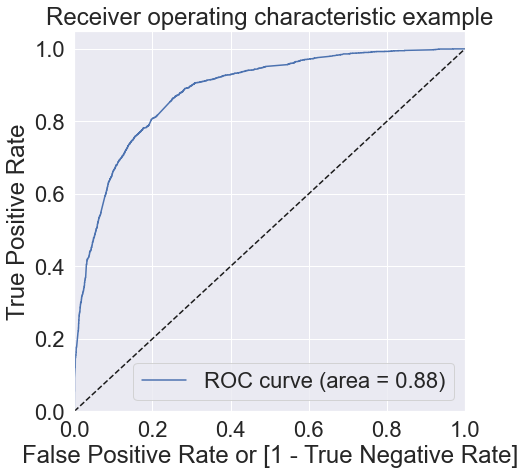

In [69]:
# Call the ROC function
draw_roc(y_train_pred_final.Converted, y_train_pred_final.Conversion_Prob)

#### Area under ROC Curve is 0.87.

In [70]:
# Creating columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Conversion_Prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

Converted  Conversion_Prob  Predicted  0.0  0.1  0.2  0.3  0.4  0.5  0.6  \
0          1         0.647883          1    1    1    1    1    1    1    1   
1          0         0.133180          0    1    1    0    0    0    0    0   
2          0         0.232946          0    1    1    1    0    0    0    0   
3          0         0.133180          0    1    1    0    0    0    0    0   
4          0         0.495090          0    1    1    1    1    1    0    0   

   0.7  0.8  0.9  
0    0    0    0  
1    0    0    0  
2    0    0    0  
3    0    0    0  
4    0    0    0

In [71]:
# Creating a dataframe to see the values of accuracy, sensitivity, and specificity at different values of probabiity cutoffs
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
# Making confusing matrix to find values of sensitivity, accurace and specificity for each level of probablity
from sklearn.metrics import confusion_matrix
num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
cutoff_df

prob  accuracy     sensi     speci
0.0   0.0  0.386711  1.000000  0.000000
0.1   0.1  0.577232  0.983306  0.321181
0.2   0.2  0.758306  0.912866  0.660847
0.3   0.3  0.788852  0.872557  0.736072
0.4   0.4  0.809321  0.765879  0.836714
0.5   0.5  0.810266  0.695847  0.882413
0.6   0.6  0.802708  0.627850  0.912965
0.7   0.7  0.773579  0.504072  0.943517
0.8   0.8  0.753582  0.413681  0.967908
0.9   0.9  0.706660  0.260179  0.988190

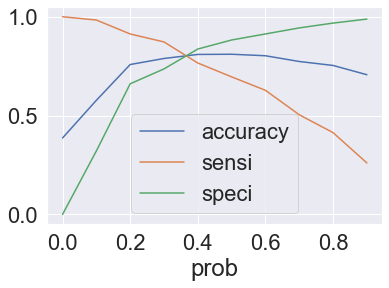

In [72]:

cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

#### From Graph we can say thay optimal cut off is around 0.35

In [73]:
y_train_pred_final['final_predicted'] = y_train_pred_final.Conversion_Prob.map( lambda x: 1 if x > 0.35 else 0)
y_train_pred_final.head()

Converted  Conversion_Prob  Predicted  0.0  0.1  0.2  0.3  0.4  0.5  0.6  \
0          1         0.647883          1    1    1    1    1    1    1    1   
1          0         0.133180          0    1    1    0    0    0    0    0   
2          0         0.232946          0    1    1    1    0    0    0    0   
3          0         0.133180          0    1    1    0    0    0    0    0   
4          0         0.495090          0    1    1    1    1    1    0    0   

   0.7  0.8  0.9  final_predicted  
0    0    0    0                1  
1    0    0    0                0  
2    0    0    0                0  
3    0    0    0                0  
4    0    0    0                1

In [74]:
# Check the overall accuracy
metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted)

0.8031806014800819

In [75]:
# Creating confusion matrix 
confusion2 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_predicted )
confusion2

array([[3127,  768],
       [ 482, 1974]], dtype=int64)

In [76]:
# true positive
TP = confusion2[1,1]
# true negatives
TN = confusion2[0,0]
# false positives
FP = confusion2[0,1] 
# false negatives
FN = confusion2[1,0]

In [77]:
# specificity
TN/(TN+FP)

0.8028241335044929

In [78]:
# sensitivity
TP/(TP+FN)

0.8037459283387622

#### Now at cut off 0.35 we have accuracy 80.3%, specifity 80.2%, Senstivity 80.3%.

### Prediction on test set

In [79]:
# Scaling numeric values
X_test[['TotalVisits', 'Page Views Per Visit', 'Total Time Spent on Website']] = scaler.transform(X_test[['TotalVisits', 'Page Views Per Visit', 'Total Time Spent on Website']])

In [80]:
# Substituting columns in the final train model
col = X_train.columns

In [81]:
# Select the columns in X_train for X_test as well
X_test = X_test[col]
# Add a constant to X_test
X_test_sm = sm.add_constant(X_test[col])
X_test_sm

const  TotalVisits  Total Time Spent on Website  \
8308    1.0     0.035461                     0.416813   
7212    1.0     0.028369                     0.001320   
2085    1.0     0.000000                     0.000000   
4048    1.0     0.028369                     0.617077   
4790    1.0     0.028369                     0.005282   
...     ...          ...                          ...   
3261    1.0     0.000000                     0.000000   
8179    1.0     0.170213                     0.148768   
6236    1.0     0.000000                     0.000000   
5240    1.0     0.078014                     0.458627   
7243    1.0     0.035461                     0.499560   

      Lead Origin_lead add form  Lead Source_olark chat  \
8308                          0                       0   
7212                          0                       0   
2085                          1                       0   
4048                          0                       0   
4790                          0                       0   
...                         ...                     ...   
3261                          0                       1   
8179                          0                       0   
6236                          0                       1   
5240                          0                       0   
7243                          0                       0   

      Lead Source_welingak website  Do Not Email_yes  \
8308                             0                 0   
7212                             0                 0   
2085                             1                 0   
4048                             0                 0   
4790                             0                 0   
...                            ...               ...   
3261                             0                 0   
8179                             0                 0   
6236                             0                 0   
5240                             0                 0   
7243                             0                 0   

      Last Activity_olark chat conversation  Last Activity_sms sent  \
8308                                      0                       0   
7212                                      0                       1   
2085                                      0                       0   
4048                                      0                       1   
4790                                      0                       0   
...                                     ...                     ...   
3261                                      1                       0   
8179                                      0                       1   
6236                                      0                       0   
5240                                      0                       1   
7243                                      0                       0   

      What is your current occupation_other  \
8308                                      0   
7212                                      0   
2085                                      0   
4048                                      0   
4790                                      0   
...                                     ...   
3261                                      0   
8179                                      0   
6236                                      0   
5240                                      0   
7243                                      0   

      What is your current occupation_student  \
8308                                        0   
7212                                        0   
2085                                        0   
4048                                        0   
4790                                        0   
...                                       ...   
3261                                        0   
8179                                        0   
6236                                        0   
5240                           

In [82]:
# Storing prediction of test set in the variable 'y_test_pred'
y_test_pred = res.predict(X_test_sm)
# Coverting it to df
y_pred_df = pd.DataFrame(y_test_pred)
# Converting y_test to dataframe
y_test_df = pd.DataFrame(y_test)
# Remove index for both dataframes to append them side by side 
y_pred_df.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)
# Append y_test_df and y_pred_df
y_pred_final = pd.concat([y_test_df, y_pred_df],axis=1)
# Renaming column 
y_pred_final= y_pred_final.rename(columns = {0 : 'Conversion_Prob'})
y_pred_final.head()

Converted  Conversion_Prob
0          0         0.456551
1          1         0.839834
2          1         0.982741
3          1         0.878240
4          0         0.108266

In [83]:
# Making prediction using cut off 0.35
y_pred_final['final_predicted'] = y_pred_final.Conversion_Prob.map(lambda x: 1 if x > 0.35 else 0)
y_pred_final

Converted  Conversion_Prob  final_predicted
0             0         0.456551                1
1             1         0.839834                1
2             1         0.982741                1
3             1         0.878240                1
4             0         0.108266                0
...         ...              ...              ...
2718          1         0.108386                0
2719          0         0.364110                1
2720          0         0.133180                0
2721          1         0.820744                1
2722          1         0.551516                1

[2723 rows x 3 columns]

In [84]:
# Check the overall accuracy
metrics.accuracy_score(y_pred_final['Converted'], y_pred_final.final_predicted)

0.8079324274697025

In [85]:
# Creating confusion matrix 
confusion3 = metrics.confusion_matrix(y_pred_final['Converted'], y_pred_final.final_predicted )
confusion3

array([[1404,  340],
       [ 183,  796]], dtype=int64)

In [86]:
# true positive
TP = confusion3[1,1]
# true negatives
TN = confusion3[0,0]
# false positives
FP = confusion3[0,1] 
# false negatives
FN = confusion3[1,0]

In [87]:
# specificity
TN/(TN+FP)

0.805045871559633

In [88]:
# sensitivity
TP/(TP+FN)

0.8130745658835546

#### for test set also at cut off 0.35 we have accuracy 80.7%, senstivity 81%, specificity 80.5%.

### Precision and Recall

In [89]:
confusion4 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.Predicted )
confusion4

array([[3437,  458],
       [ 747, 1709]], dtype=int64)

In [90]:
# true positive
TP = confusion4[1,1]
# true negatives
TN = confusion4[0,0]
# false positives
FP = confusion4[0,1] 
# false negatives
FN = confusion4[1,0]

In [91]:
# Precision 
TP/(TP + FP)

0.7886479003230272

In [92]:
#Recall
TP/(TP + FN)

0.6958469055374593

#### At current cut off  0.35 we have Precision around 78.8% and Recall around 69.5%

### ROC Curve for Optimum Cut off value for Precision and Recall

In [93]:
from sklearn.metrics import precision_recall_curve

In [94]:
y_train_pred_final.Converted, y_train_pred_final.Predicted

(0       1
 1       0
 2       0
 3       0
 4       0
        ..
 6346    0
 6347    0
 6348    0
 6349    0
 6350    1
 Name: Converted, Length: 6351, dtype: int64,
 0       1
 1       0
 2       0
 3       0
 4       0
        ..
 6346    0
 6347    0
 6348    0
 6349    0
 6350    0
 Name: Predicted, Length: 6351, dtype: int64)

In [95]:
p, r, thresholds = precision_recall_curve(y_train_pred_final.Converted, y_train_pred_final.Conversion_Prob)

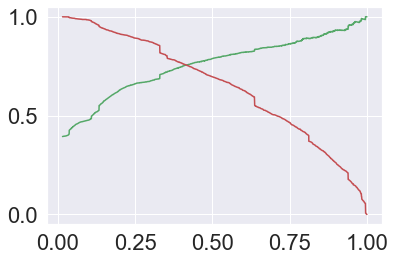

In [96]:
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()

#### From graph we can see optimum cut off is around 0.41.

In [97]:
y_train_pred_final['final_predicted'] = y_train_pred_final.Conversion_Prob.map(lambda x: 1 if x > 0.41 else 0)
y_train_pred_final.head()

Converted  Conversion_Prob  Predicted  0.0  0.1  0.2  0.3  0.4  0.5  0.6  \
0          1         0.647883          1    1    1    1    1    1    1    1   
1          0         0.133180          0    1    1    0    0    0    0    0   
2          0         0.232946          0    1    1    1    0    0    0    0   
3          0         0.133180          0    1    1    0    0    0    0    0   
4          0         0.495090          0    1    1    1    1    1    0    0   

   0.7  0.8  0.9  final_predicted  
0    0    0    0                1  
1    0    0    0                0  
2    0    0    0                0  
3    0    0    0                0  
4    0    0    0                1

In [98]:
# Accuracy
metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted)

0.8110533774208786

In [99]:
# Creating confusion matrix again
confusion5 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_predicted )
confusion5

array([[3287,  608],
       [ 592, 1864]], dtype=int64)

In [100]:
# true positive
TP = confusion5[1,1]
# true negatives
TN = confusion5[0,0]
# false positives
FP = confusion5[0,1] 
# false negatives
FN = confusion5[1,0]

In [101]:
# Precision
TP / (TP + FP)

0.7540453074433657

In [102]:
#Recall
TP / (TP + FN)

0.758957654723127

#### At  cut off  0.41 we have accuracy 81% Precision around 75.4% and Recall around 75.8%

### Prediction on test set

In [103]:
# Storing prediction of test set in the variable 'y_test_pred'
y_test_pred = res.predict(X_test_sm)
# Coverting it to df
y_pred_df = pd.DataFrame(y_test_pred)
# Converting y_test to dataframe
y_test_df = pd.DataFrame(y_test)
# Remove index for both dataframes to append them side by side 
y_pred_df.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)
# Append y_test_df and y_pred_df
y_pred_final = pd.concat([y_test_df, y_pred_df],axis=1)
# Renaming column 
y_pred_final= y_pred_final.rename(columns = {0 : 'Conversion_Prob'})
y_pred_final.head()

Converted  Conversion_Prob
0          0         0.456551
1          1         0.839834
2          1         0.982741
3          1         0.878240
4          0         0.108266

In [104]:
# Making prediction using cut off 0.41
y_pred_final['final_predicted'] = y_pred_final.Conversion_Prob.map(lambda x: 1 if x > 0.41 else 0)
y_pred_final

Converted  Conversion_Prob  final_predicted
0             0         0.456551                1
1             1         0.839834                1
2             1         0.982741                1
3             1         0.878240                1
4             0         0.108266                0
...         ...              ...              ...
2718          1         0.108386                0
2719          0         0.364110                0
2720          0         0.133180                0
2721          1         0.820744                1
2722          1         0.551516                1

[2723 rows x 3 columns]

In [105]:
# Check the overall accuracy
metrics.accuracy_score(y_pred_final['Converted'], y_pred_final.final_predicted)

0.8152772677194271

In [106]:
# Creating confusion matrix 
confusion6 = metrics.confusion_matrix(y_pred_final['Converted'], y_pred_final.final_predicted )
confusion6

array([[1470,  274],
       [ 229,  750]], dtype=int64)

In [107]:
# true positive
TP = confusion6[1,1]
# true negatives
TN = confusion6[0,0]
# false positives
FP = confusion6[0,1] 
# false negatives
FN = confusion6[1,0]

In [108]:
# Precision
TP / (TP + FP)

0.732421875

In [109]:
#Recall
TP / (TP + FN)

0.7660878447395302

#### At current cut off  0.41 we have Precision around 73.2% and Recall around 76.6%

### Conclusion
It was found that the variables that mattered the most in the potential buyers are:
1.	The total time spend on the Website.
2.	Total number of visits.
3.	When the lead source was: <br>
a.	Welingak website<br>
b.	Olark chat<br>
c.	Organic search<br>
d.	Google<br>
4.	When the last activity was:<br>
a.	SMS sent<br>
b.	Olark chat conversation<br>
5.	When the lead origin was 'Lead add form': <br>
6.	When their current occupation is working professional or unemployeed.<br>
Keeping these in mind the X Education can flourish as they have a very high chance to get almost all the potential buyers to change their mind and buy their courses.